<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Привет, Роман!</b>

Меня зовут Алексей, и я буду проверять твой проект. Прошу прощения за долгое ожидание
    
Предлагаю общаться на «<b>ты</b>», но если это неудобно — обязательно сообщи об этом.
    
Ниже ты увидишь мои комментарии, выделенные разным цветом:
    
<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Отлично!</b> ✔️: все ок, продолжай в том же духе :)

</div>
<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
<b>Есть совет</b> ⚠️: так выделены некритичные замечания или советы, которые смогут улучшить твой проект.

</div>
<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Нужно доработать</b> ❌: так выделены важные замечания — без их исправления проект не может быть принят.
    
</div>

Будет здорово, если ты будешь участвовать в диалоге, а свои вопросы, комментарии и изменения в проекте тоже будешь выделять, например, вот так:
    
<div class="alert alert-info">
    <b>Комментарий студента:</b> твой комментарий
</div>
    
Пожалуйста, не перемещай и не удаляй мои комментарии, это усложнит повторную проверку.
    
</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Привет, Алексей!
</div>
    

<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Еще раз привет!</b>

Спасибо, что доделал работу, оформление комментариев остается тем же, только обозначим номер итерации: v2
    
</div>

# Исследование поведения гостей сети отелей «Как в гостях»

  В рамках данного исследования перед нами стоит задача выявить потенциальных клиентов отеля, склонных к отмене бронирования номеров. Отмена бронирования номера ведет к убыткам сети, поскольку исходя из показателей бронирования происходит расчет и планирование ресурсов для оказания услуг для постояльцев (отсутствие возможности реализовать забронированный номер, закупка продовольствия, количество персонала и др. ресурсы сферы гостеприимства).
 
  В целях сокращения убытков компания внедрила систему предоплаты номеров. Размер необходимого депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь. При этом важно предлагать внесение обязательного депозита не всем гостям, а только тем, которые будут склонны к отмене заказа, исходя из прошлого опыта бронирования, который представлен в виде тренировочной выборки и тестовой, важно выделить гостей вероятно реализующих бронирование и гостей вероятно воспользующихся функцией отмены бронирования. Такая задача - задача классификации - стоит перед моделью машинного обучения, главную метрику для оценки мы выберем F1, демонстрирующую баланс полноты и точности предсказаний модели.
 
  Также важнейшим показателем бизнеса является прибыль, потому мы также оценим насколько затраты на производство модели будут экономически оправданы и выгодны уже на этапе тестирования модели.
 
  В рамках исследования мы прежде проанализируем и обработаем имеющиеся у нас в распоряжении данные, затем построим модель, проведем испытания лучшей модели на тестовой выборке, сделаем расчет экономических показателей, выявим показатели "надежного клиента" и сделаем общий вывод всего исследования.

## Исследовательский анализ данных

### Первичное знакомство с данными

Для работы нам понадобятся некоторые модули и инструменты, перечислим их в первой ячейке кода данной работы. 

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from scipy import stats as st
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

Переменным **hotel** и **hotel_test** присвоим обучающую и тестовые выборки соответственно.

In [2]:
try:
    hotel = pd.read_csv('C://Users//roma_//OneDrive//Рабочий стол//DATA//Проект Как в гостях//hotel_train.csv')
    hotel_original = pd.read_csv('C://Users//roma_//OneDrive//Рабочий стол//DATA//Проект Как в гостях//hotel_train.csv')
    hotel_test = pd.read_csv('C://Users//roma_//OneDrive//Рабочий стол//DATA//Проект Как в гостях//hotel_test.csv')
    hotel_test_original = pd.read_csv('C://Users//roma_//OneDrive//Рабочий стол//DATA//Проект Как в гостях//hotel_test.csv')
   
except:
    hotel = pd.read_csv('/datasets/hotel_train.csv')
    hotel_original = pd.read_csv('/datasets/hotel_train.csv')
    hotel_test = pd.read_csv('/datasets/hotel_test.csv')
    hotel_test_original = pd.read_csv('/datasets/hotel_test.csv')

Познакомимся с общими харакретиристиками датасетов с помощью функции `info()` и `head()`

In [3]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

In [4]:
hotel.head(10)

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3
5,5,1,75.0,2015,July,27,1,0,3,2.0,...,0,0,0,D,0,0,Transient,0,0,3
6,6,1,23.0,2015,July,27,1,0,4,2.0,...,0,0,0,E,0,0,Transient,0,0,4
7,7,0,18.0,2015,July,27,1,0,4,2.0,...,0,0,0,G,1,0,Transient,0,1,4
8,8,0,68.0,2015,July,27,1,0,4,2.0,...,0,0,0,D,0,0,Transient,0,3,4
9,9,0,37.0,2015,July,27,1,0,4,2.0,...,0,0,0,E,0,0,Contract,0,0,4


Как мы видим, пропусков в данных нет, каждое наблюдение в полном объеме представлено значениями показателей. Целевым столбцом будет выступать - **is_canceled**, который содержит информацию об отмененных бронированиях (значение - **"1"**). Перейдем к обзору тестовой выборки. 

In [5]:
hotel_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

Так же все без исключения наблюдения имеют значения представленных в таблице переменных.

In [6]:
hotel_test.head(10)

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7
5,6091,1,52.0,2017,January,1,1,2,5,1.0,...,0,0,0,A,0,0,Transient,0,0,7
6,6092,1,143.0,2017,January,1,2,1,1,2.0,...,0,0,0,A,1,0,Transient,0,1,2
7,6093,1,21.0,2017,January,1,2,1,3,2.0,...,0,0,0,A,0,0,Transient,0,1,4
8,6094,1,89.0,2017,January,1,2,1,3,2.0,...,0,0,0,E,0,0,Transient,0,0,4
9,6095,1,48.0,2017,January,1,2,1,4,2.0,...,0,0,0,A,1,0,Transient,0,2,5


Кажется весьма странным тот факт, что первые десять наблюдений отражают только данные отмененных бронирований номеров, есть основания полагать в неслучайной очередности наблюдений. Проверим эту гипотезу, посчитаем сумму первой тысячи сток по целевому признаку.

In [7]:
hotel_test['is_canceled'][:1000].sum()

998

Да, так оно и есть, нам важно этот факт учесть при тестировании модели.

Предварительное знакомство позволило нам составить общее впечатление о датасете. В нашем распоряжении  значительный объем данных, на первый взгляд весьма высоко качества, в датасетах отсутвтвуют пропуски, типы данных в стобцах и неслучайный порядок распределения наблюдений в тестовой выборке  нуждаются в предобработке. 

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: верно, данные на месте!</div>

### Предобработка данных

Выясним количество явных дубликатов.

In [8]:
print(
    'Количество явных дубликатов в таблице обучающей выборки:', hotel.duplicated().sum(),
    '\nКоличество явных дубликатов в таблице тестовой выборки:', hotel_test.duplicated().sum()
     )

Количество явных дубликатов в таблице обучающей выборки: 0 
Количество явных дубликатов в таблице тестовой выборки: 0


Отлично, это еще раз подтверждает тезис о высоком качестве данных.

Проверим на уникальности **id** клиентов. 

In [9]:
hotel_test['id'].duplicated().sum()

0

In [10]:
hotel['id'].duplicated().sum()

0

ID-клиента действительно являются уникальными.

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: еще стоит проверить наличие полных дубликатов после удаления id</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Сделал ниже.
</div>

### Изменение типов данных столбцов

В рамках общего обзора данных мы можем увидеть, что столбцы `"lead_time"`, `"adults"`, `"children"`, `"babies"` содержат тип данных **float**, что является чрезмерным, в столбцах явно дискретные количественные данные. Потому изменим тип данных в данных столбцах на целочисленный **int**.

In [11]:
hotel['lead_time'] = hotel['lead_time'].astype(int)
hotel['adults'] = hotel['adults'].astype(int)
hotel['children'] = hotel['children'].astype(int)
hotel['babies'] = hotel['babies'].astype(int)

То же проделаем и с тестовой выборкой.

In [12]:
hotel_test['lead_time'] = hotel_test['lead_time'].astype(int)
hotel_test['adults'] = hotel_test['adults'].astype(int)
hotel_test['children'] = hotel_test['children'].astype(int)
hotel_test['babies'] = hotel_test['babies'].astype(int)

Отлично, перейдем к исследованию непосредственно данных в столбцах. 

### Анализ данных в датасетах

Прежде всего стоит отметить тот факт, что колонка **"id"** для нас и для модели не представляет никакого интереса, потому следует ее сразу исключить из обоих датасетов. Обучающая и тестовая выборки должны быть одноразмерными.

In [13]:
hotel = hotel.drop(['id'], axis=1)
hotel_test = hotel_test.drop(['id'], axis=1)

In [242]:
hotel_original = hotel_original.drop(['id'], axis=1)
hotel_test_original = hotel_test_original.drop(['id'], axis=1)

После удаления столбца `id`, проверим датасеты на наличие дубликатов.

In [14]:
hotel.duplicated().sum()

21377

In [15]:
hotel_test.duplicated().sum()

7717

Да, вот терерь мы сразу можем видеть, что в данных присутсвуют дубликаты, и много дубликатов. Для модели такое явление нежелательно, потому мы их удалим.

In [16]:
hotel.drop_duplicates(inplace=True)
hotel_test.drop_duplicates(inplace=True)

In [243]:
hotel_original.drop_duplicates(inplace=True)
hotel_test_original.drop_duplicates(inplace=True)

In [17]:
hotel.shape

(43852, 24)

In [18]:
hotel_test.shape

(24695, 24)

Наблюдений стало меньше, но тенденции в них, надеемся, проявятся более выраженно. 

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: согласен, так как дубликаты могут привести к переобучению моделей(особенно при использовании кросс-валидации), то правильнее их будет удалить</div>

Далее будем рассматривать распределение данных в столбцах представленных датасетов.

И прежде рассмотрим ключевой показатель, в котором содержится показатель отмены бронирования.

In [19]:
hotel['is_canceled'].value_counts()

0    32704
1    11148
Name: is_canceled, dtype: int64

In [20]:
hotel_test['is_canceled'].value_counts()

0    16910
1     7785
Name: is_canceled, dtype: int64

Дисбаланс классов в обучающей выборке выражен явно. Нам важно это учитывать при работе моделей. Тестовая выборка имеет меньший дисбаланс. 

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все так, дисбаланс однозначно есть, хоть и некритичный</div>

Переходим к анализу столбца `"lead_time"`, где мы можем ознакомится с количеством дней, прошедших между датой бронирования и датой прибытия, можно предложить, что данный признак весьма важным для модели. Построим для распределения признака гистограмму и график **boxplot**.

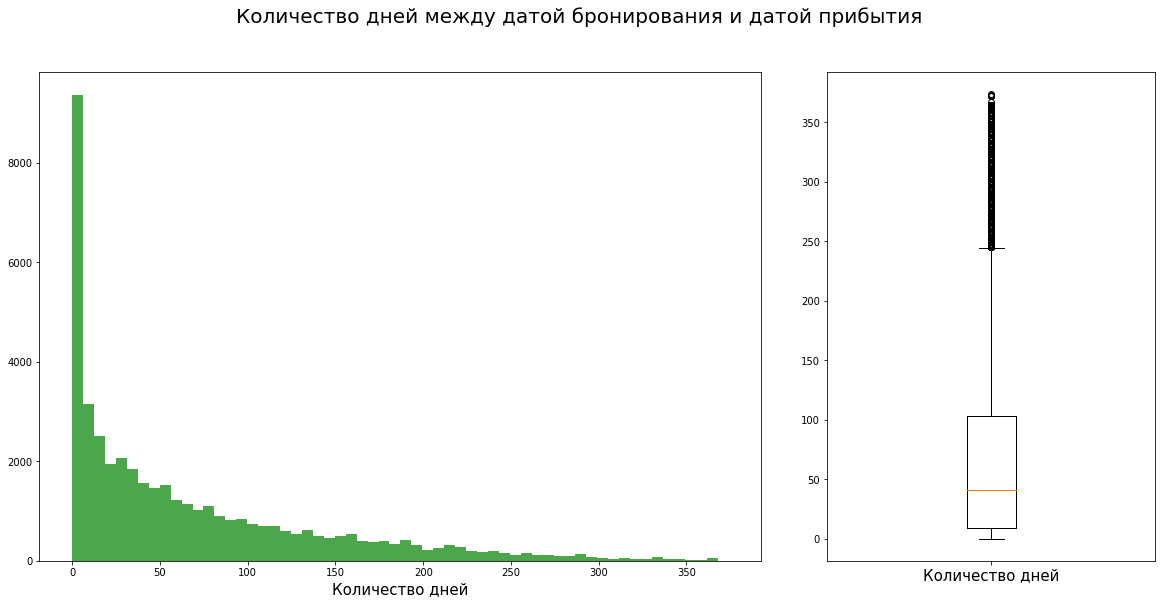

In [21]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 9))

fig.suptitle('Количество дней между датой бронирования и датой прибытия', fontsize=20)

ax_1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=3)
ax_2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3)

ax_1.hist(hotel['lead_time'], 60, facecolor='g', alpha=0.7)
ax_2.boxplot(hotel['lead_time'])

plt.xticks([1], ['Количество дней'], fontsize=15)

ax_1.set_xlabel('Количество дней', fontsize=15)


plt.show()

In [22]:
hotel['lead_time'].describe()

count    43852.000000
mean        67.893779
std         73.990715
min          0.000000
25%          9.000000
50%         41.000000
75%        103.000000
max        374.000000
Name: lead_time, dtype: float64

В распределении преобладает значение "0", значительно большинство постояльцев прибыли в отель буквально в день бронирования номера, данное значение является предельным в распределении. Описание данных не вполне точно характеризует столбец, уточним количество и наличие отказов от бронирования в заказах при бронировании в день заселения. 

In [23]:
len(hotel[hotel['lead_time'] == 0])

3110

In [24]:
len(hotel[(hotel['lead_time'] == 0) & (hotel['is_canceled'] == 1)])

178

И при бронировании в день заселения также встречаются отмены заказа. Любопытно.

Рассмотрим графики распределения без нулевого значения, чтобы составить еще более наглядное представление о распределении данных в столбце и о выбросах.

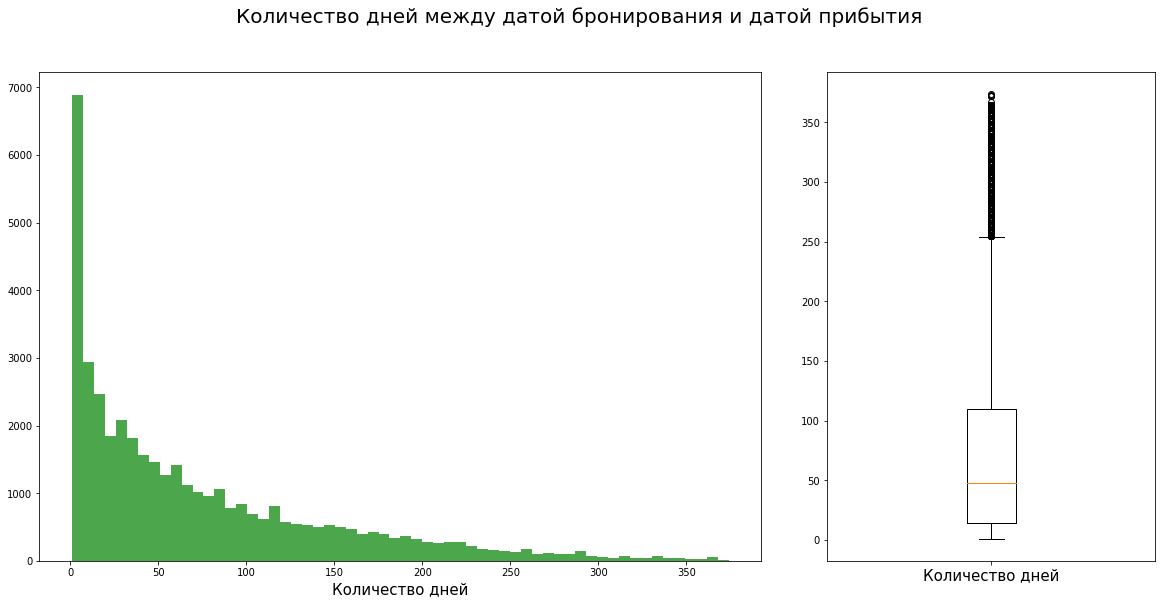

In [25]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 9))

fig.suptitle('Количество дней между датой бронирования и датой прибытия', fontsize=20)

ax_1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=3)
ax_2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3)

ax_1.hist(hotel[hotel['lead_time'] != 0]['lead_time'], 60, facecolor='g', alpha=0.7)
ax_2.boxplot(hotel[hotel['lead_time'] != 0]['lead_time'])

plt.xticks([1], ['Количество дней'], fontsize=15)

ax_1.set_xlabel('Количество дней', fontsize=15)


plt.show()

In [26]:
hotel[hotel['lead_time'] != 0]['lead_time'].describe()

count    40742.000000
mean        73.076383
std         74.254973
min          1.000000
25%         14.000000
50%         48.000000
75%        110.000000
max        374.000000
Name: lead_time, dtype: float64

Ожидаемо второе минимальное значение оказалось равным единице и это встречается куда чаще остальных, хотя и не с таким преимуществом, какое имеет значение **"0"** в столбце. При этом хочется отметить отсутствие явных аномалий, сохраним все данные в обучающем датасете по результатам анализа столбца `"lead_time"`.

Построим графики распределения и для тестовой таблицы, проверим данные на их аномальность.

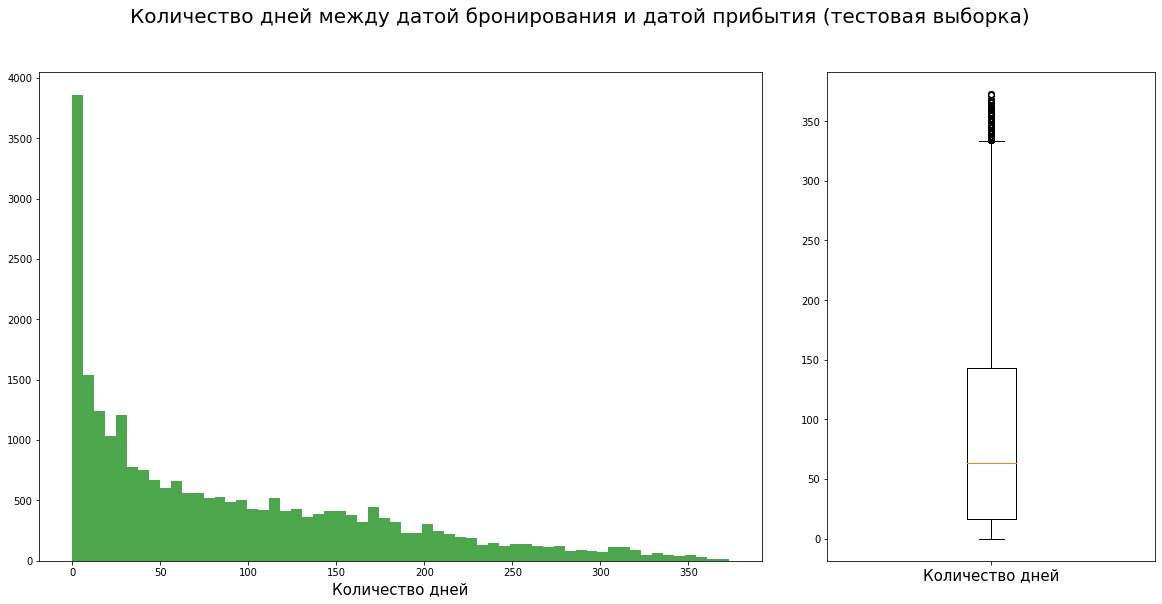

In [27]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 9))

fig.suptitle('Количество дней между датой бронирования и датой прибытия (тестовая выборка)', fontsize=20)

ax_1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=3)
ax_2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3)

ax_1.hist(hotel_test['lead_time'], 60, facecolor='g', alpha=0.7)
ax_2.boxplot(hotel_test['lead_time'])

plt.xticks([1], ['Количество дней'], fontsize=15)

ax_1.set_xlabel('Количество дней', fontsize=15)


plt.show()

In [28]:
hotel_test['lead_time'].describe()

count    24695.000000
mean        88.834541
std         85.506551
min          0.000000
25%         16.000000
50%         63.000000
75%        143.000000
max        373.000000
Name: lead_time, dtype: float64

Отлично! И в тестовой выборке мы не видим аномальных значений, все они реальны при достаточно высоком диапазоне для бронирования отеля, мы можем наблюдать бронирование номера более чем за год до прибытия.

Перейдем к столбцу `"arrival_date_year"`, который содержит информацию о том, в каком году произошел заезд гостей. 

In [29]:
hotel['arrival_date_year'].unique()

array([2015, 2016])

In [30]:
hotel_test['arrival_date_year'].unique()

array([2017])

Боюсь, что данный столбец будет абсолютно бесполезен для модели и нашего предсказания, а можем быть и вреден. Удалим столбец из выборок.

In [31]:
hotel = hotel.drop(['arrival_date_year'], axis=1)
hotel_test = hotel_test.drop(['arrival_date_year'], axis=1)

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: согласен, модели не придется делать предсказания для прошлых лет</div>

Рассмотрим бронирование по месяцам, данные об этого содержит столбец `"arrival_date_month"`.

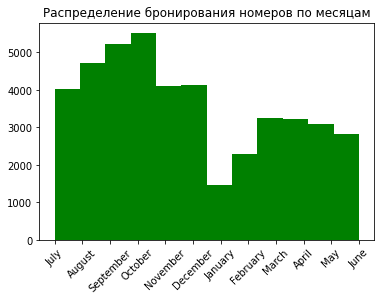

In [32]:
fig, ax = plt.subplots()

plt.hist(hotel['arrival_date_month'], bins=12, color='g')

plt.title('Распределение бронирования номеров по месяцам')

plt.xticks(rotation=45)
plt.show() 

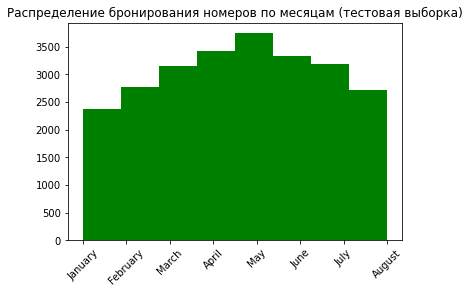

In [33]:
fig, ax = plt.subplots()

plt.hist(hotel_test['arrival_date_month'], bins=8, color='g')

plt.title('Распределение бронирования номеров по месяцам (тестовая выборка)')

plt.xticks(rotation=45)
plt.show() 

Данные тестовой выборки, к сожалению, не охватывают самые популярные месяца заездов постояльцев в отель. Распределение обучающей выборки характерно выделяет сентябрь и октябрь, иметь данные об этих месяцах в тестовой выборке было бы очень полезно.

Построим гистограмму распределения бронирования по каждой недели в году, столбец `'arrival_date_week_number'`

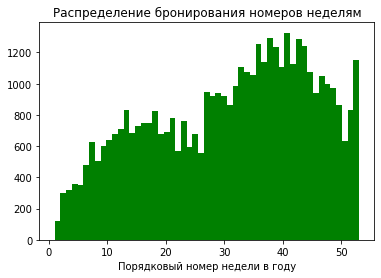

In [34]:
fig, ax = plt.subplots()

plt.hist(hotel['arrival_date_week_number'], bins=53, color='g')

plt.title('Распределение бронирования номеров неделям')


plt.xlabel('Порядковый номер недели в году')
plt.show() 

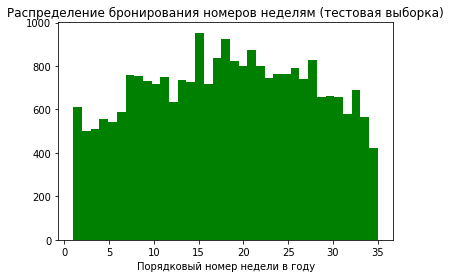

In [35]:
fig, ax = plt.subplots()

plt.hist(hotel_test['arrival_date_week_number'], bins=35, color='g')

plt.title('Распределение бронирования номеров неделям (тестовая выборка)')


plt.xlabel('Порядковый номер недели в году')
plt.show() 

Ожидаемо мы видим похожую картину и в распределении бронирования по неделям в году, ярко выделяется период конца сентября - начала октября на обучающей выборке, на тестовой этот период не представлен. 

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: не соглашусь, если в обучающей выборке представлен бОльший период, чем в тестовой выборке, то при правильном обучении никаких проблем возникнуть не должно, модель должна научиться определять отмену бронирования во все сезоны, пусть даже не для всех сезонов ей придется делать предсказания на тестовой выборке. А вот если бы в тестовой выборке были представлены месяцы, которых бы не было в обучающей выборке, это бы была проблема, в таком случае удаление таких месяцев вполне оправдано, чтобы финальная метрика была более показательна</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Да, ты прав. Оставляем весь период в датасетах.
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

Идем дальше, и следующий столбец `'arrival_date_day_of_month'` содержит информацию о дне месяца, в которое произошло или только планировалось, в случае отмены, заселения в номера. 

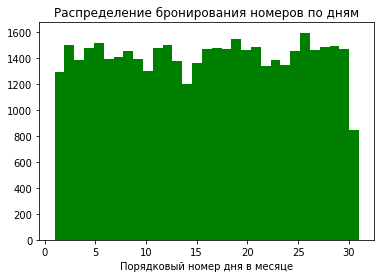

In [36]:
fig, ax = plt.subplots()

plt.hist(hotel['arrival_date_day_of_month'], bins=31, color='g')

plt.title('Распределение бронирования номеров по дням')


plt.xlabel('Порядковый номер дня в месяце')
plt.show() 

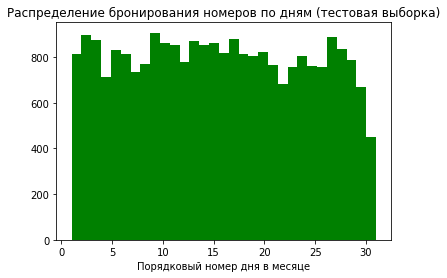

In [37]:
fig, ax = plt.subplots()

plt.hist(hotel_test['arrival_date_day_of_month'], bins=31, color='g')

plt.title('Распределение бронирования номеров по дням (тестовая выборка)')


plt.xlabel('Порядковый номер дня в месяце')
plt.show() 

Распределение бронирования по дням месяца имеет выраженных характер равномерного распределения, с весьма логичным снижением показателя значения **"31"**. Данный столбец весьма неинформативен, скорее может способствовать неверным трактовкам наблюдения алгоритмом, потому верным решением будет исключение данного показателя из выборок.

In [38]:
hotel = hotel.drop(['arrival_date_day_of_month'], axis=1)
hotel_test = hotel_test.drop(['arrival_date_day_of_month'], axis=1)

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

Далее перейдем к столбцам `"stays_in_weekend_nights"` и `"stays_in_week_nights"`, где мы находим данные о количестве забронированных ночей в номерах в выходные дни и в будние дни соответственно.

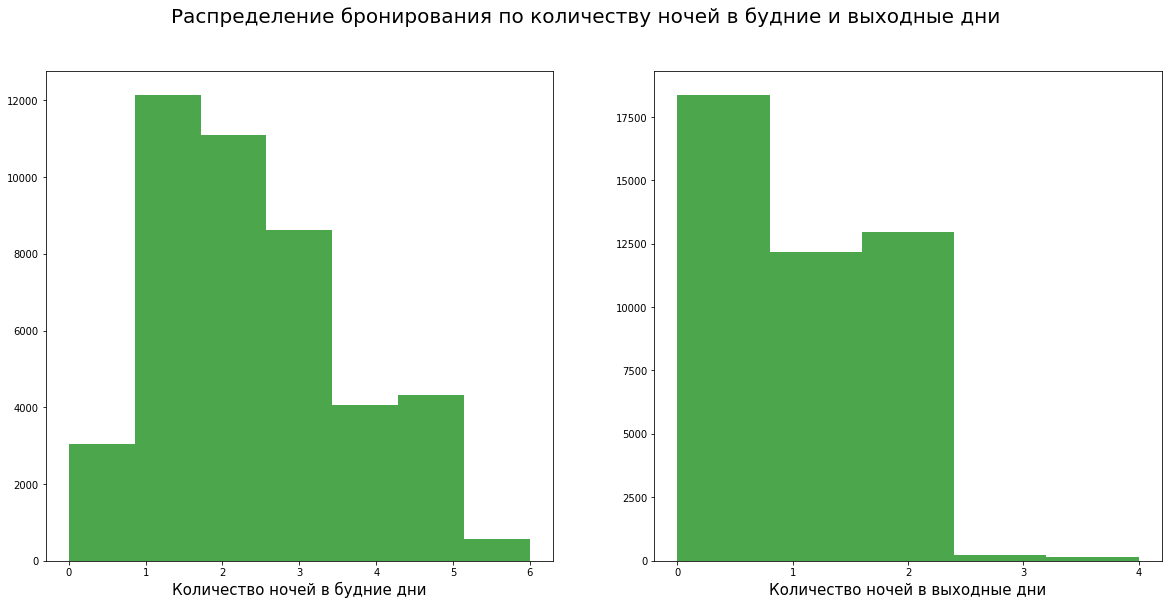

In [39]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 9))

fig.suptitle('Распределение бронирования по количеству ночей в будние и выходные дни', fontsize=20)

ax_1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=2)
ax_2 = plt.subplot2grid((2, 2), (0, 1), colspan=2, rowspan=2)

ax_1.hist(hotel['stays_in_week_nights'], 7, facecolor='g', alpha=0.7)
ax_2.hist(hotel['stays_in_weekend_nights'], 5, facecolor='g', alpha=0.7)


ax_1.set_xlabel('Количество ночей в будние дни', fontsize=15)
ax_2.set_xlabel('Количество ночей в выходные дни', fontsize=15)
ax_2.set_xticks([0, 1, 2, 3, 4])


plt.show()

Далее рассмотрим то же распределение, но уже на тестовой выборке.

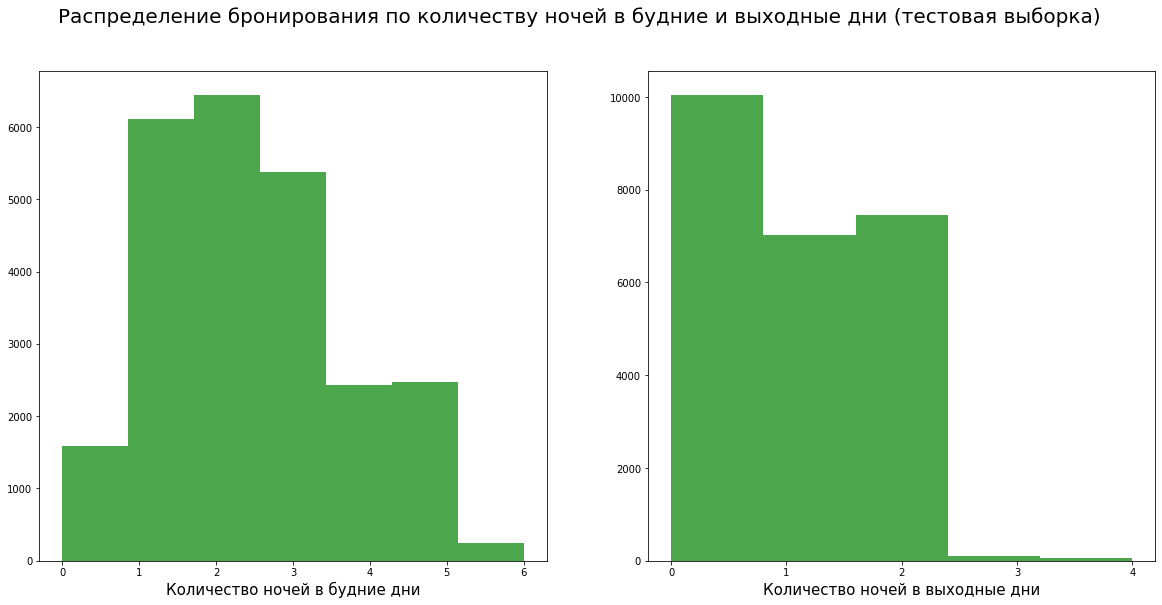

In [40]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 9))

fig.suptitle('Распределение бронирования по количеству ночей в будние и выходные дни (тестовая выборка)', fontsize=20)

ax_1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=2)
ax_2 = plt.subplot2grid((2, 2), (0, 1), colspan=2, rowspan=2)

ax_1.hist(hotel_test['stays_in_week_nights'], 7, facecolor='g', alpha=0.7)
ax_2.hist(hotel_test['stays_in_weekend_nights'], 5, facecolor='g', alpha=0.7)


ax_1.set_xlabel('Количество ночей в будние дни', fontsize=15)
ax_2.set_xlabel('Количество ночей в выходные дни', fontsize=15)
ax_2.set_xticks([0, 1, 2, 3, 4])


plt.show()

Гистограммы данных указывают на допустимые значения, постояльцы, как правило, бронируют проживание в отеле на небольшой срок, который может вовсе не включать выходные дни.

Далее рассмотрим возрастное распределение в представленных данных. Столбец `'adults'`сообщает о числе взрослых постояльцев при бронировании номеров. 

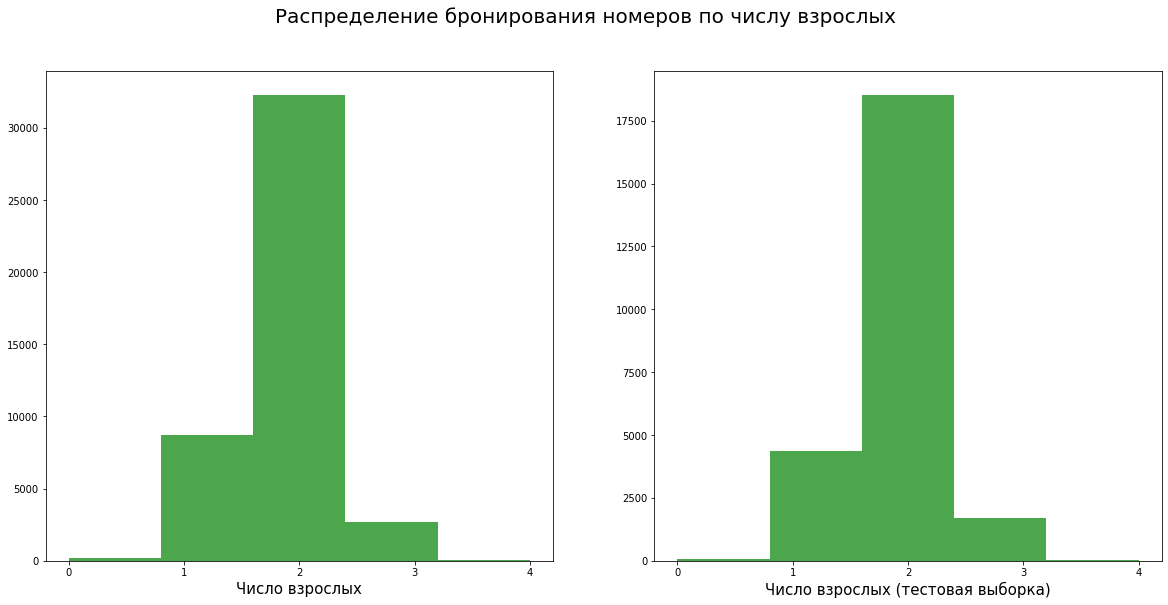

In [41]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 9))

fig.suptitle('Распределение бронирования номеров по числу взрослых', fontsize=20)

ax_1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=2)
ax_2 = plt.subplot2grid((2, 2), (0, 1), colspan=2, rowspan=2)

ax_1.hist(hotel['adults'], 5, facecolor='g', alpha=0.7)
ax_2.hist(hotel_test['adults'], 5, facecolor='g', alpha=0.7)


ax_1.set_xlabel('Число взрослых', fontsize=15)
ax_2.set_xlabel('Число взрослых (тестовая выборка)', fontsize=15)
ax_1.set_xticks([0, 1, 2, 3, 4])
ax_2.set_xticks([0, 1, 2, 3, 4])


plt.show()

Графики распределения числа взрослых имеют схожий вид, при этом мы наблюдаем нулевые значения в столбце `'adults'`, что говорит об аномалии, без взрослых нет возможности забронировать номер.

In [42]:
print(
    'Количество забронированных номеров без взрослых в обучающей выборке:', hotel[hotel['adults'] == 0].shape[0], 
    '\nКоличество забронированных номеров без взрослых в тестовой выборке:', hotel_test[hotel_test['adults'] == 0].shape[0]
)

Количество забронированных номеров без взрослых в обучающей выборке: 164 
Количество забронированных номеров без взрослых в тестовой выборке: 65


Рассмотрим и другой вид аномалий, характеризующий количество гостей, а именно забронированные номера без постояльцев.

In [43]:
print(
    'Количество забронированных номеров без гостей в обучающей выборке:', 
    hotel[(hotel['adults'] == 0 ) & (hotel['children'] == 0 ) & (hotel['babies'] == 0)].shape[0], 
    '\nКоличество забронированных номеров без гостей в тестовой выборке:', 
    hotel_test[(hotel_test['adults'] == 0 ) & (hotel_test['children'] == 0 ) & (hotel_test['babies'] == 0)].shape[0]
)

Количество забронированных номеров без гостей в обучающей выборке: 15 
Количество забронированных номеров без гостей в тестовой выборке: 7


И такой вид аномалий встречаются в выборках, в таком случае нам стоит такие наблюдения исключить из выборки.

In [44]:
hotel = hotel[(hotel['adults'] != 0 ) | (hotel['children'] != 0 ) | (hotel['babies'] != 0)]
hotel_test = hotel_test[(hotel_test['adults'] != 0 ) | (hotel_test['children'] != 0 ) | (hotel_test['babies'] != 0)]

Что же касается строк без взрослых, но с постояльцами детьми, мы можем заменить значения в столбце `'adults'` на наиболее часто встречающееся значение в этом столбце, а именно - **2**. Это видится вполне обоснованным, в большинстве случаев семьи состоят из двух взрослых и детей.

In [45]:
hotel.loc[hotel['adults'] == 0, ['adults']] = 2
hotel_test.loc[hotel_test['adults'] == 0, ['adults']] = 2

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: детям до 14 лет без взрослых сдать номер не могут, тогда все бронирования без взрослых постояльцев похожи на аномалии, которые лучше обработать. В том числе стоит проверить, есть ли бронирования вообще без постояльцев</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Поправил.
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

Распределение значений числа детей от 3 до 14 лет - столбец `'children'` -  обещает быть в примерно том же диапазоне, потому используем гистограммы для визуализации.

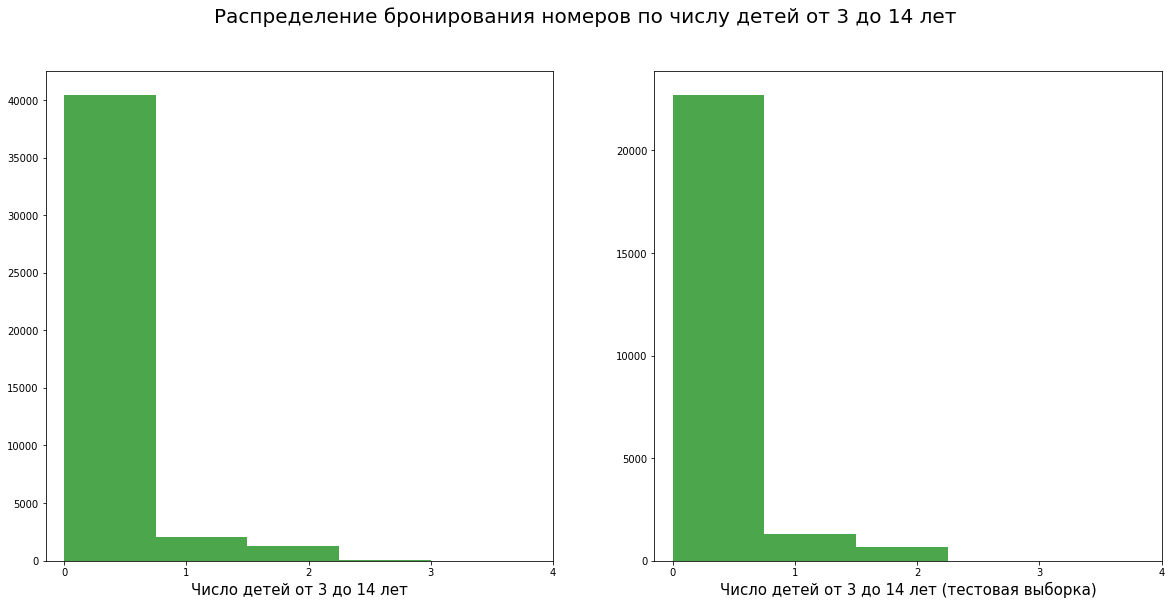

In [46]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 9))

fig.suptitle('Распределение бронирования номеров по числу детей от 3 до 14 лет', fontsize=20)

ax_1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=2)
ax_2 = plt.subplot2grid((2, 2), (0, 1), colspan=2, rowspan=2)

ax_1.hist(hotel['children'], 4, facecolor='g', alpha=0.7)
ax_2.hist(hotel_test['children'], 4, facecolor='g', alpha=0.7)


ax_1.set_xlabel('Число детей от 3 до 14 лет', fontsize=15)
ax_2.set_xlabel('Число детей от 3 до 14 лет (тестовая выборка)', fontsize=15)
ax_1.set_xticks([0, 1, 2, 3, 4])
ax_2.set_xticks([0, 1, 2, 3, 4])


plt.show()

Так и есть, графики распределения в выборках очень похожи. Ознакомимся и с распределениями по числу самых маленьких гостей.

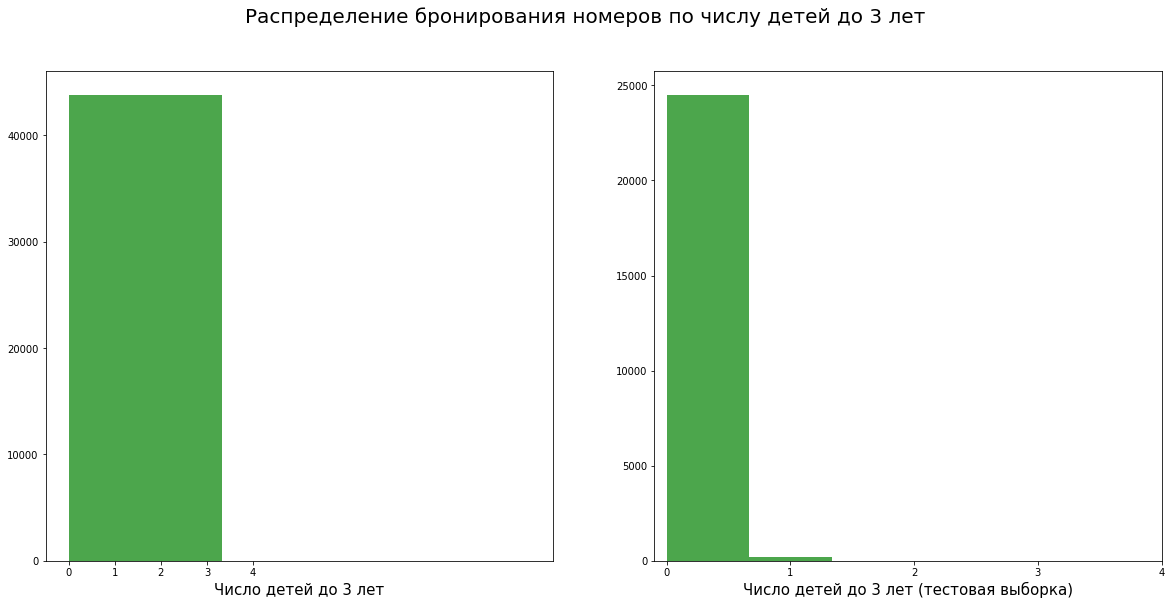

In [47]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 9))

fig.suptitle('Распределение бронирования номеров по числу детей до 3 лет', fontsize=20)

ax_1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=2)
ax_2 = plt.subplot2grid((2, 2), (0, 1), colspan=2, rowspan=2)

ax_1.hist(hotel['babies'], 3, facecolor='g', alpha=0.7)
ax_2.hist(hotel_test['babies'], 3, facecolor='g', alpha=0.7)


ax_1.set_xlabel('Число детей до 3 лет', fontsize=15)
ax_2.set_xlabel('Число детей до 3 лет (тестовая выборка)', fontsize=15)
ax_1.set_xticks([0, 1, 2, 3, 4])
ax_2.set_xticks([0, 1, 2, 3, 4])


plt.show()

График распределения обучающей выборки явно сообщает нам о наличии аномалий. Рассмотрим уникальные значения в столбце `babies`.

In [48]:
hotel['babies'].unique()

array([ 0,  1,  2, 10,  9])

In [49]:
hotel_test['babies'].unique()

array([0, 1, 2])

In [50]:
hotel['babies'].value_counts()

0     43388
1       444
2         3
9         1
10        1
Name: babies, dtype: int64

In [51]:
hotel_test['babies'].value_counts()

0    24514
1      170
2        4
Name: babies, dtype: int64

Да, так оно есть в обучающей выборке аномальное значения, расстанемся с ним.

In [52]:
hotel = hotel[hotel['babies'] <= 2]

Отлично, при этом мы видим, что нулевое значение столбца `'babies'` на несколько порядков превосходит другие, для модели гораздо информативнее будет выглядеть данный столбец в бинарном выражении.

In [53]:
hotel.loc[hotel['babies'] != 0, ['babies']] = 1
hotel_test.loc[hotel_test['babies'] != 0, ['babies']] = 1

Теперь поправим наименование данного признака, поскольку в таком виде он может ввести в заблуждение, дадим имя столбцу `'babies'`, дабы подчеркнуть бинарный порядок распределения его значений.

In [54]:
hotel.rename(columns={'babies': 'has_babies'}, inplace=True)
hotel_test.rename(columns={'babies': 'has_babies'}, inplace=True)

In [55]:
print(hotel['has_babies'].unique())
print(hotel_test['has_babies'].unique())
print('------------------------')
print(
    'Уникальные значения столбца "has_babies" в обучающей выборке:',
    hotel['has_babies'].unique()[0], 'и', hotel['has_babies'].unique()[1], 
    '\nУникальные значения столбца "has_babies" в тестовой выборке:', 
    hotel_test['has_babies'].unique()[0], 'и', hotel_test['has_babies'].unique()[1]
)

[0 1]
[0 1]
------------------------
Уникальные значения столбца "has_babies" в обучающей выборке: 0 и 1 
Уникальные значения столбца "has_babies" в тестовой выборке: 0 и 1


Все прошло успешно, новый столбец `'has_babies'` имеет бинарное распределение значений.

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: все так, но бронирований с 2 младенцами тоже слишком мало, чтобы использовать их для прогноза, такие записи тоже лучше удалить или приравнять к 1. Тогда признак можно переименовать, например, в `has_babies`, чтобы обозначить его теперь уже бинарную природу</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Готово)
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

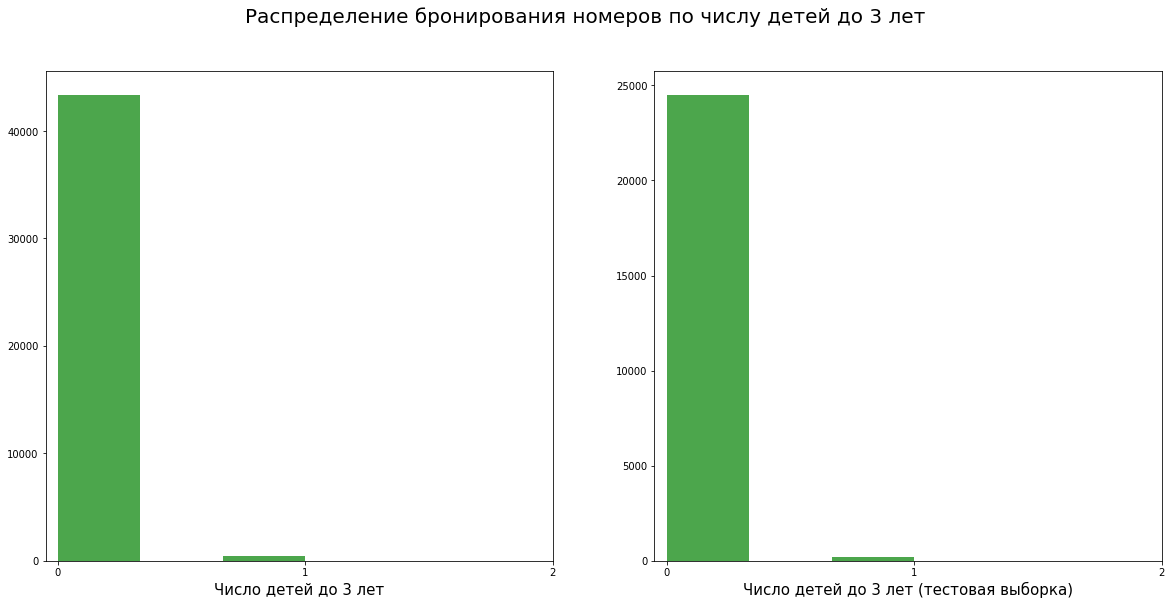

In [56]:
fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 9))

fig.suptitle('Распределение бронирования номеров по числу детей до 3 лет', fontsize=20)

ax_1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=2)
ax_2 = plt.subplot2grid((2, 2), (0, 1), colspan=2, rowspan=2)

ax_1.hist(hotel['has_babies'], 3, facecolor='g', alpha=0.7)
ax_2.hist(hotel_test['has_babies'], 3, facecolor='g', alpha=0.7)


ax_1.set_xlabel('Число детей до 3 лет', fontsize=15)
ax_2.set_xlabel('Число детей до 3 лет (тестовая выборка)', fontsize=15)
ax_1.set_xticks([0, 1, 2])
ax_2.set_xticks([0, 1, 2])


plt.show()

На очереди столбец `'meal'`, который сожержит категории питания жильцов:

**SC** — нет дополнительных опций;
**BB** — включён завтрак;
**HB** — включён завтрак и обед;
**FB** — включён завтрак, обед и ужин.

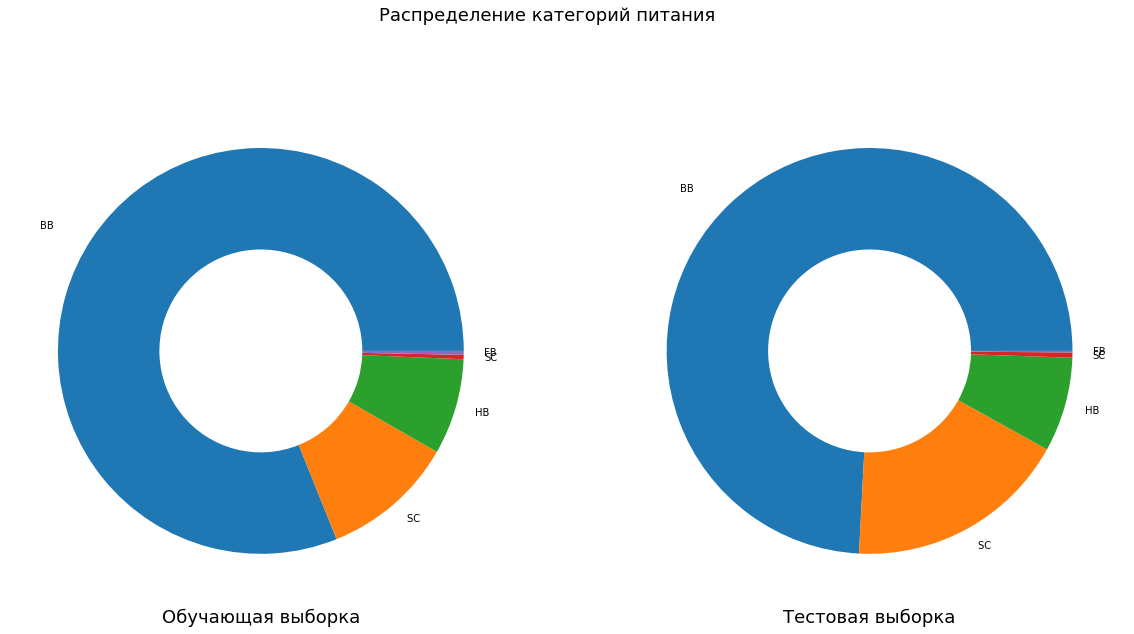

In [57]:
vals1 = hotel['meal'].value_counts()
vals2 = hotel_test['meal'].value_counts()

fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 10))

fig.suptitle('Распределение категорий питания', fontsize=18)

ax_1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=2)
ax_2 = plt.subplot2grid((2, 2), (0, 1), colspan=2, rowspan=2)

ax_1.pie(vals1, labels=vals1.index, wedgeprops=dict(width=0.5))
ax_2.pie(vals2, labels=vals2.index, wedgeprops=dict(width=0.5))

ax_1.set_xlabel('Обучающая выборка', fontsize=18)
ax_2.set_xlabel('Тестовая выборка', fontsize=18)

plt.show()

Диаграмма выделяет нам пять вариаций значений столбца, и дубликат значения **SC**. Выведем на экран уникальные значения столбцов.

In [58]:
hotel['meal'].unique()

array(['BB       ', 'FB       ', 'HB       ', 'SC       ', 'SC'],
      dtype=object)

In [59]:
hotel_test['meal'].unique()

array(['BB       ', 'HB       ', 'SC', 'FB       ', 'SC       '],
      dtype=object)

В строковых значениях мы видим пробелы, причина дубликатов именно в этом. Удалим пробелы с использованием метода `str.strip()`. 

In [60]:
hotel['meal'] = hotel['meal'].str.strip()
hotel_test['meal'] = hotel_test['meal'].str.strip()

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: хорошо, что заметил лишние пробелы!</div>

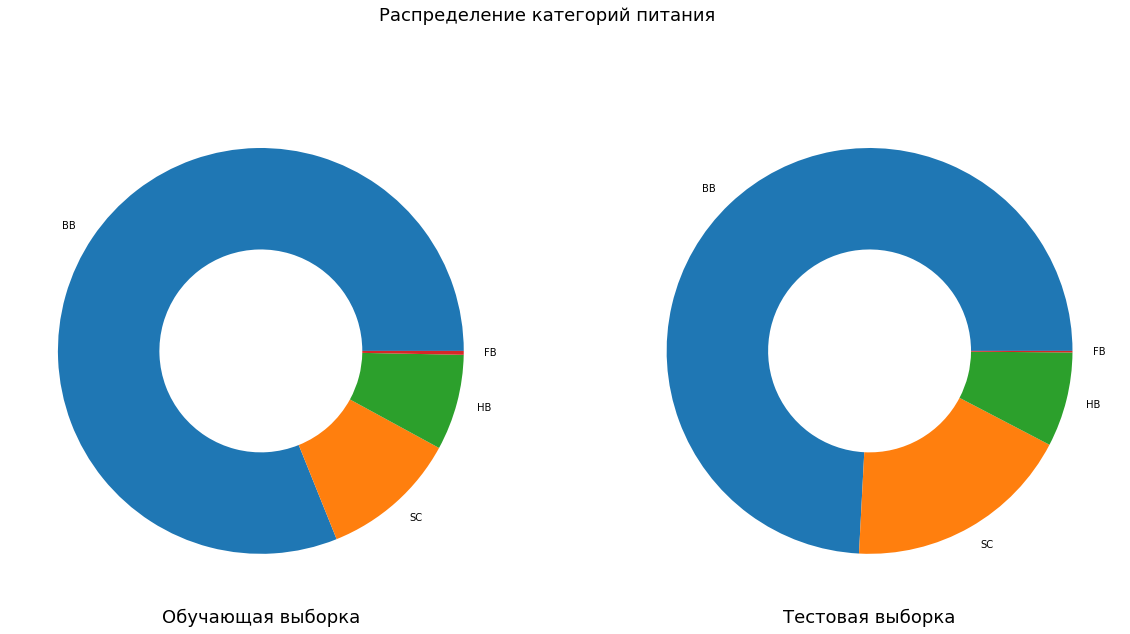

In [61]:
vals1 = hotel['meal'].value_counts()
vals2 = hotel_test['meal'].value_counts()

fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 10))

fig.suptitle('Распределение категорий питания', fontsize=18)

ax_1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=2)
ax_2 = plt.subplot2grid((2, 2), (0, 1), colspan=2, rowspan=2)

ax_1.pie(vals1, labels=vals1.index, wedgeprops=dict(width=0.5))
ax_2.pie(vals2, labels=vals2.index, wedgeprops=dict(width=0.5))

ax_1.set_xlabel('Обучающая выборка', fontsize=18)
ax_2.set_xlabel('Тестовая выборка', fontsize=18)

plt.show()

Теперь все в порядке, количество категорий питания в отелях приведено к стандартным четырем. Вид распределения очень похож между двумя выборками, при этом опция полного трехразового питания **FB** тестовой выборке весьма заметнее. Наиболее распространенный вид опции - это включенный завтрак для гостей.

Следующий столбец в распределении - это страна постояльцев, или страны гражданами которых они являются. Выведем список уникальных значений столбца `country`.

In [62]:
hotel['country'].unique()

array(['GBR', 'PRT', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'USA', 'DEU',
       'BEL', 'CHE', 'CN', 'GRC', 'NLD', 'ARG', 'RUS', 'SWE', 'POL',
       'EST', 'CZE', 'ITA', 'FIN', 'DNK', 'MOZ', 'BWA', 'LUX', 'BRA',
       'SVN', 'ALB', 'CHN', 'MEX', 'MAR', 'SMR', 'LVA', 'CHL', 'AUT',
       'LTU', 'TUR', 'ISR', 'IND', 'CYM', 'AUS', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'TUN', 'ARE', 'HRV', 'HKG', 'IRN', 'GIB',
       'JEY', 'URY', 'ZAF', 'COL', 'GGY', 'KWT', 'CYP', 'KAZ', 'THA',
       'DOM', 'NGA', 'BLR', 'VEN', 'UKR', 'ARM', 'JPN', 'LKA', 'MYS',
       'BIH', 'MUS', 'OMN', 'SUR', 'JAM', 'BGR', 'CIV', 'SRB', 'JOR',
       'SYR', 'PHL', 'PRI', 'SGP', 'BDI', 'LBN', 'AGO', 'VNM', 'AZE',
       'PLW', 'NZL', 'EGY', 'MDV', 'CMR', 'MLT', 'SVK', 'MWI', 'STP',
       'TWN', 'IDN', 'SEN', 'PER', 'SAU', 'KNA', 'ETH', 'ECU', 'IRQ',
       'AND', 'HND', 'PAK', 'GEO', 'ZMB', 'QAT', 'KHM', 'MCO', 'BGD',
       'ISL', 'UZB', 'IMN', 'TJK', 'NIC', 'BEN', 'MAC', 'VGB', 'TZA',
       'GAB', 'MKD', 

Действительно география стран гостей весьма широка, построим столбчатые диаграммы топ-10 стран с самым высоким представительством в сети отелей.

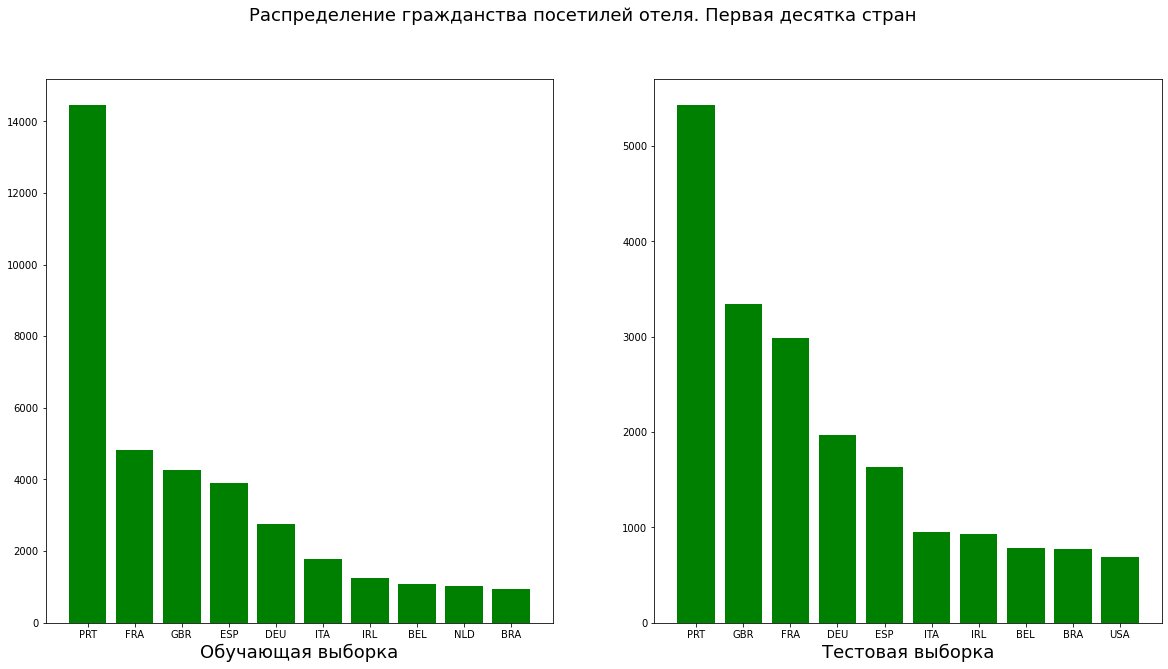

In [63]:
vals1 = hotel['country'].value_counts().head(10)
vals2 = hotel_test['country'].value_counts().head(10)

fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 10))

fig.suptitle('Распределение гражданства посетилей отеля. Первая десятка стран ', fontsize=18)

ax_1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=2)
ax_2 = plt.subplot2grid((2, 2), (0, 1), colspan=2, rowspan=2)

ax_1.bar(vals1.index, vals1, color='g')
ax_2.bar(vals2.index, vals2, color='g')

ax_1.set_xlabel('Обучающая выборка', fontsize=18)
ax_2.set_xlabel('Тестовая выборка', fontsize=18)

plt.show()

Наибольшее количество гостей для обеих выборках - это граждане Португалии. Преимущественно в отелях сети пребывают европейцы, хотя мы видим уже в первой десятки бразильцев, а в тестовой еще граждан Соединенных Штатов. 

Перейдем к распределению бронирования между букинг-сервисами, данные столбца `'distribution_channel'`.

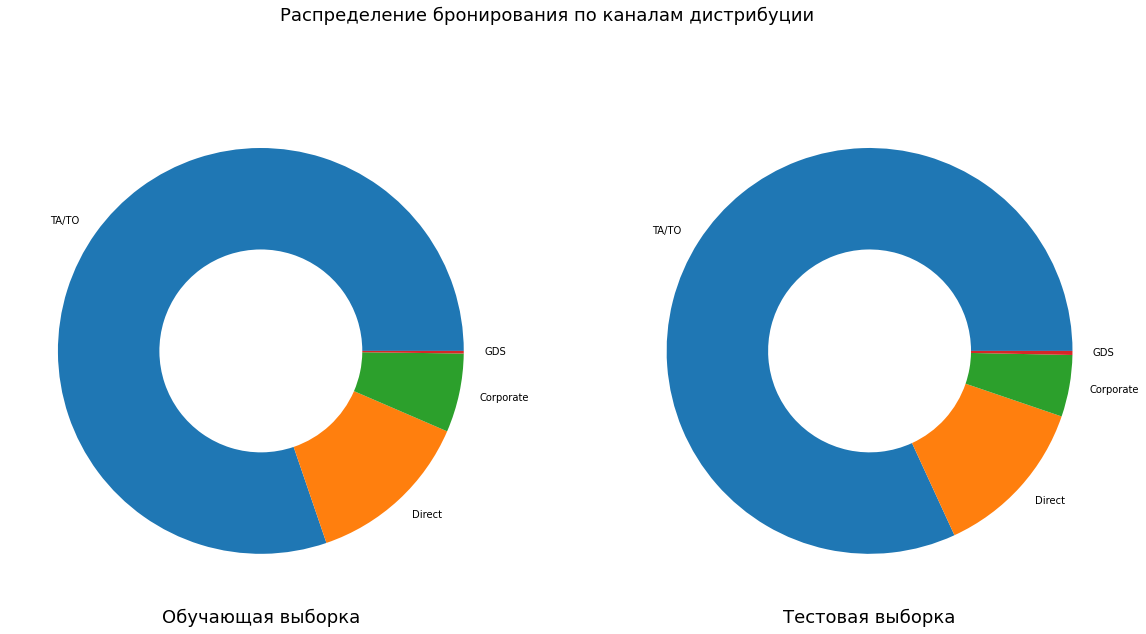

In [64]:
vals1 = hotel['distribution_channel'].value_counts()
vals2 = hotel_test['distribution_channel'].value_counts()

fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 10))

fig.suptitle('Распределение бронирования по каналам дистрибуции', fontsize=18)

ax_1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=2)
ax_2 = plt.subplot2grid((2, 2), (0, 1), colspan=2, rowspan=2)

ax_1.pie(vals1, labels=vals1.index, wedgeprops=dict(width=0.5))
ax_2.pie(vals2, labels=vals2.index, wedgeprops=dict(width=0.5))

ax_1.set_xlabel('Обучающая выборка', fontsize=18)
ax_2.set_xlabel('Тестовая выборка', fontsize=18)

plt.show()

В распределении выделяется сервис TA/TO, на него приходится большая часть всех бронирований, графики распределений между выборками выражают одно соотношение между каналами дистрибуции.

Проанализируем распределение столбца `'is_repeated_guest'`, который содержит признак того, что гость бронирует номер второй раз, в наших выборках.

In [65]:
hotel['is_repeated_guest'].value_counts()

0    42392
1     1443
Name: is_repeated_guest, dtype: int64

In [66]:
hotel_test['is_repeated_guest'].value_counts()

0    23688
1     1000
Name: is_repeated_guest, dtype: int64

Большее число пользователей бронировало номера впервые, сравним процентное соотношение между выборками.

In [67]:
hotel['is_repeated_guest'].value_counts() / len(hotel) * 100

0    96.70811
1     3.29189
Name: is_repeated_guest, dtype: float64

In [68]:
hotel_test['is_repeated_guest'].value_counts() / len(hotel_test) * 100

0    95.949449
1     4.050551
Name: is_repeated_guest, dtype: float64

Соотношение распределения призанака бронирование очень близкое в обучающей и тестовой выборках.

Проведем анализ как видится двух важных для исследования столбцов:
    
`'previous_bookings_not_canceled'` — количество подтверждённых заказов у клиента;

`'previous_cancellations'` — количество отменённых заказов у клиента.

Рассмотрим встречающиеся значения в столбцах и их частотность.

In [69]:
hotel['previous_cancellations'].value_counts()[:10]

0     42684
1       995
2        52
3        47
11       27
5        13
4         5
13        3
6         2
24        2
Name: previous_cancellations, dtype: int64

In [70]:
hotel['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14, 24, 19,  4,  5, 21,  6, 13, 11])

In [71]:
hotel_test['previous_cancellations'].value_counts()[:10]

0    24466
1      161
2       29
6       15
4       10
3        6
5        1
Name: previous_cancellations, dtype: int64

Преобладающее значения столбца `'previous_cancellations'` - это значение **0**, другие значения отстают на несколько порядков, значения видятся вполне реалистичными.

In [72]:
hotel['previous_bookings_not_canceled'].value_counts()[:10]

0    42352
1      597
2      251
3      134
4      113
5       89
6       55
7       34
8       25
9       23
Name: previous_bookings_not_canceled, dtype: int64

In [73]:
hotel['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6, 10, 12, 13, 15, 21,  7,  9,  8, 11, 14,
       18, 22, 16, 17, 19, 20, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 25])

In [74]:
hotel_test['previous_bookings_not_canceled'].value_counts()[:10]

0     23659
1       407
2       160
3        87
4        59
5        46
6        38
7        33
8        24
10       21
Name: previous_bookings_not_canceled, dtype: int64

Все что сказано выше о столбце `'previous_cancellations'` можно применить к значениям столбца `'previous_bookings_not_canceled'`. Сохраняем информацию в предоставленном нам виде.

Переходим к столбцу `'reserved_room_type'`, рассмотрим категории забронированных номеров и их распределение по выборкам. Категории наименованы буквами от A до G, где A - высшая категория обслуживания и, соответственно, стоимости обслуживания, а G - низшая.

In [75]:
hotel['reserved_room_type'].unique()

array(['A               ', 'C               ', 'D               ',
       'E               ', 'G               ', 'F               ',
       'B               '], dtype=object)

In [76]:
hotel_test['reserved_room_type'].unique()

array(['A               ', 'E               ', 'G               ',
       'D               ', 'F               ', 'C               ',
       'B               '], dtype=object)

In [77]:
hotel['reserved_room_type'].value_counts()

A                   30434
D                    8421
E                    2251
F                    1178
B                     744
G                     580
C                     227
Name: reserved_room_type, dtype: int64

В значения присутствуют присутсвуют пробелы, воспользуемся уже знакомой функцией `str.strip()`.

In [78]:
hotel['reserved_room_type'] = hotel['reserved_room_type'].str.strip() 
hotel_test['reserved_room_type'] = hotel_test['reserved_room_type'].str.strip()

Визуализируем распределение столбиковой диаграммой.

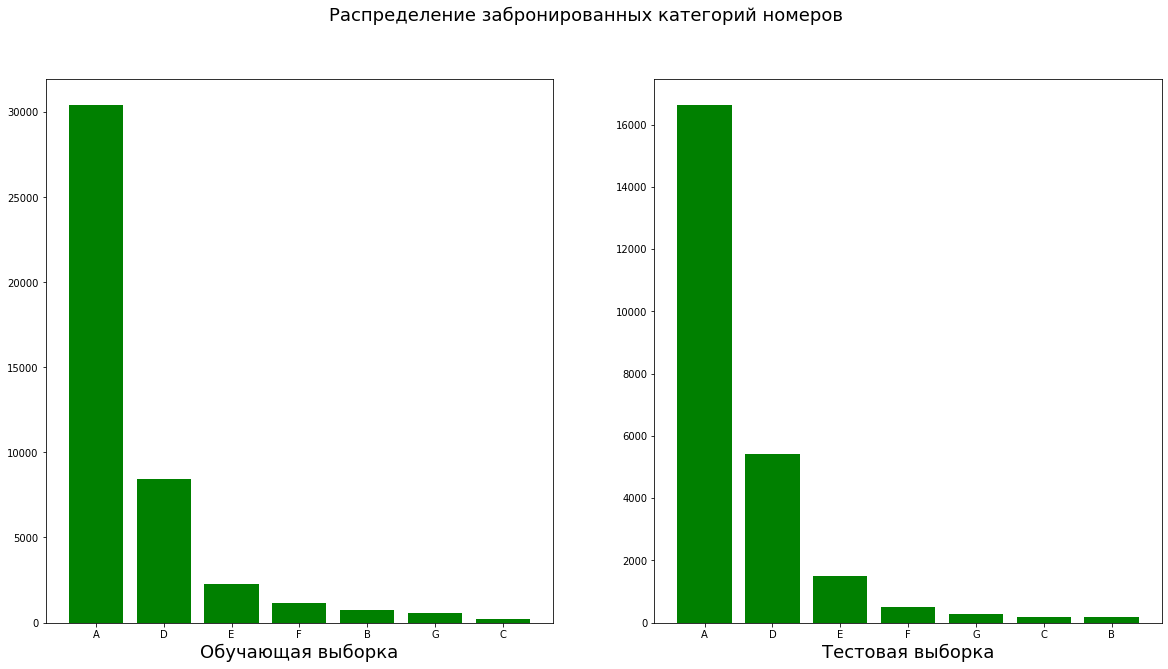

In [79]:
vals1 = hotel['reserved_room_type'].value_counts()
vals2 = hotel_test['reserved_room_type'].value_counts()

fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 10))

fig.suptitle('Распределение забронированных категорий номеров', fontsize=18)

ax_1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=2)
ax_2 = plt.subplot2grid((2, 2), (0, 1), colspan=2, rowspan=2)

ax_1.bar(vals1.index, vals1, color='g')
ax_2.bar(vals2.index, vals2, color='g')

ax_1.set_xlabel('Обучающая выборка', fontsize=18)
ax_2.set_xlabel('Тестовая выборка', fontsize=18)

plt.show()

Как видим, распределение категорий весьма похожа в выборках, наиболее популярная категория у постояльцев высшая категория **A**, в тройке **D** и **E**. 

Затем проанализируем распределения параметра `'booking_changes'` - количество изменений параметров заказа.

In [80]:
hotel['booking_changes'].value_counts()

0     36263
1      5386
2      1573
3       375
4       138
5        40
6        18
7        18
8         7
9         5
13        4
10        2
14        2
15        2
16        1
17        1
Name: booking_changes, dtype: int64

In [81]:
hotel_test['booking_changes'].value_counts()

0     20614
1      2593
2      1066
3       252
4       109
5        27
6        15
7         5
16        1
18        1
8         1
10        1
11        1
14        1
15        1
Name: booking_changes, dtype: int64

Распределение значений данных уже привычное. Большинство заказов не редактировались пользователями, а далее по убыванию представлены наблюдения с большим количеством правок, буквально в числовом порядке возрастания. Поведение данных вполне типичное для большого набора наблюдений. 

Следующим в очереди у нас столбец `'days_in_waiting_list'`, который сообщает нам количество дней ожидания подтверждения заказа.

In [82]:
hotel['days_in_waiting_list'].value_counts()

0      43355
63        42
15        19
87        18
48        16
       ...  
45         1
81         1
160        1
142        1
14         1
Name: days_in_waiting_list, Length: 97, dtype: int64

In [83]:
hotel_test['days_in_waiting_list'].value_counts()

0      24513
59         6
25         6
60         6
71         6
       ...  
57         1
73         1
105        1
121        1
223        1
Name: days_in_waiting_list, Length: 75, dtype: int64

Видим значительные различия в данных по признаку.

In [84]:
hotel['days_in_waiting_list'].value_counts().head(10) / len(hotel) * 100

0      98.904985
63      0.095814
15      0.043344
87      0.041063
48      0.036501
44      0.031938
77      0.025094
38      0.025094
176     0.022813
31      0.022813
Name: days_in_waiting_list, dtype: float64

In [85]:
hotel_test['days_in_waiting_list'].value_counts().head(10) / len(hotel_test) * 100

0     99.291154
59     0.024303
25     0.024303
60     0.024303
71     0.024303
46     0.020253
28     0.020253
5      0.020253
4      0.020253
14     0.020253
Name: days_in_waiting_list, dtype: float64

Подавляющее количество заказов было подтверждено в день бронирования. Рассмотрим уникальные значения переменных. 

In [86]:
hotel['days_in_waiting_list'].unique()

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  22, 142,   2,  13,
        44,  38,  48,  33,  77,  21,  80,  59,  40,  58,  89,  53,  49,
        60,  69,  87,  91,  57,  99, 111,  79,  98,  85,  63,  15,   3,
        20,  93,   4,  41,  34, 224,  31,  39,  56, 187, 176,  71,  55,
        96, 236, 259, 207, 215, 160, 120,  30,  32,  27,  62,  24, 108,
       147,   5,  14, 107,  70,   8,  35, 178, 174, 162,  68,  11, 193,
        10,  76,  17,  45,   6,  19,  28,  42,  25,  46,   9,   1,  43,
        72,  12,  61,  81,  74, 167])

In [87]:
len(hotel['days_in_waiting_list'].unique())

97

In [88]:
len(hotel_test['days_in_waiting_list'].unique())

75

In [89]:
hotel_test['days_in_waiting_list'].unique()

array([  0,  14,  60, 100, 121,  61,   5,   1, 107,  43, 122,  83,   4,
       113,  18,  20, 185,  93, 109,  34,   6,  13,   8, 154,  64,  99,
        76,  16,  22,  28,  21,   9, 165,   2,  44,  17,  53,  38,  50,
       111,  25,  46,   7,  47,  27,  49,  84,  30, 175, 183,  39,  56,
        31,  10,  15,  23,  63,  33,  32,  11,  35, 117,  57,  12,  80,
        71,  54,  59,  26,  73, 223, 105,  65,  36,  98])

Данные показывают, что в 2017 году доля заказов без подтверждения сократилось до половины процента. Наверняка, сервисом были предприняты и успешно внедрены решения для такого результата. В данных присутствуют выбросы значений, но нет оснований считать, что они являются аномальными. Принимая во внимание распределение данный критерий лучше оценивать в бинарном выражении.

In [90]:
hotel.loc[hotel['days_in_waiting_list'] != 0, ['days_in_waiting_list']] = 1
hotel_test.loc[hotel_test['days_in_waiting_list'] != 0, ['days_in_waiting_list']] = 1

In [91]:
hotel.rename(columns={'days_in_waiting_list': 'is_in_waiting_list'}, inplace=True)
hotel_test.rename(columns={'days_in_waiting_list': 'is_in_waiting_list'}, inplace=True)

In [92]:
print(hotel['is_in_waiting_list'].unique())
print(hotel_test['is_in_waiting_list'].unique())
print('------------------------')
print(
    'Уникальные значения столбца "is_in_waiting_list" в обучающей выборке:',
    hotel['is_in_waiting_list'].unique()[0], 'и', hotel['is_in_waiting_list'].unique()[1], 
    '\nУникальные значения столбца "is_in_waiting_list" в тестовой выборке:', 
    hotel_test['is_in_waiting_list'].unique()[0], 'и', hotel_test['is_in_waiting_list'].unique()[1]
)

[0 1]
[0 1]
------------------------
Уникальные значения столбца "is_in_waiting_list" в обучающей выборке: 0 и 1 
Уникальные значения столбца "is_in_waiting_list" в тестовой выборке: 0 и 1


Отлично, значения столбца приобрели более удобный вид для нашей будущей модели.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: верно, этот признак вполне можно попробовать сделать бинарным, никакой полезной информации не потеряется, зато можно избавиться от шума в данных</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Готово)
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

Следующим столбцом для анализа мы рассмотрим столбец `'customer_type'`, он содержит данные о типах заказчиков.

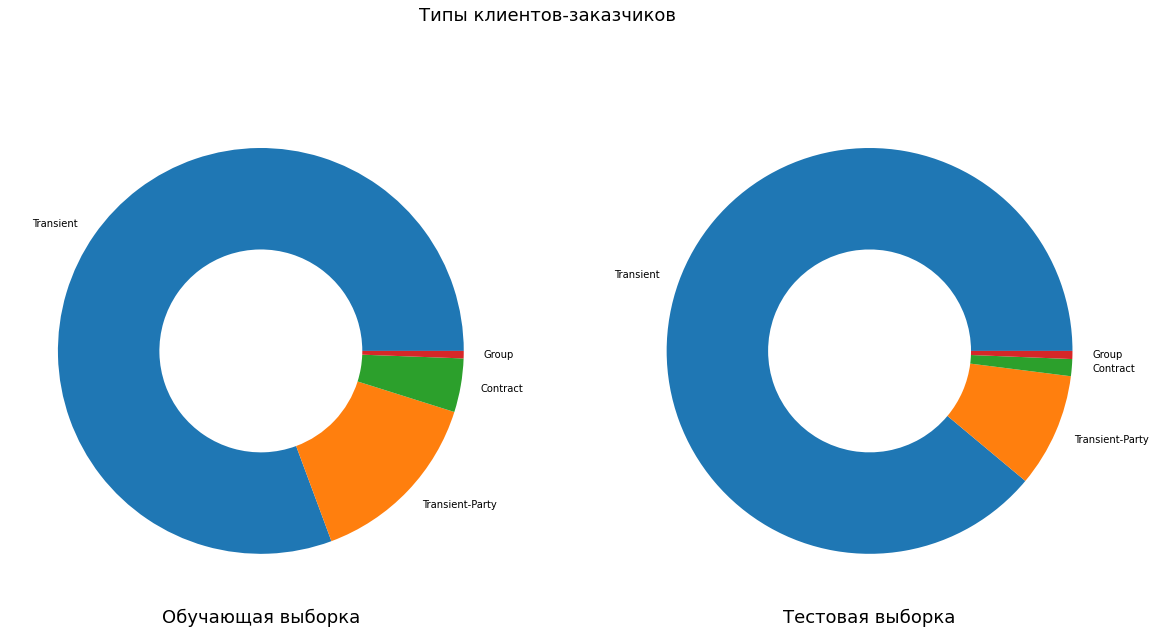

In [93]:
vals1 = hotel['customer_type'].value_counts()
vals2 = hotel_test['customer_type'].value_counts()

fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 10))

fig.suptitle('Типы клиентов-заказчиков', fontsize=18)

ax_1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=2)
ax_2 = plt.subplot2grid((2, 2), (0, 1), colspan=2, rowspan=2)

ax_1.pie(vals1, labels=vals1.index, wedgeprops=dict(width=0.5))
ax_2.pie(vals2, labels=vals2.index, wedgeprops=dict(width=0.5))

ax_1.set_xlabel('Обучающая выборка', fontsize=18)
ax_2.set_xlabel('Тестовая выборка', fontsize=18)

plt.show()

Диаграмма сообщает нам, что самым частым типом клиентом является обычный частных заказ, его доля с развитием букинг-технологий растет. 

Количество заказанных парковочных мест отражает столбец `'required_car_parking_spaces'`.

Проанализируем распределение признака на обучающей...

In [94]:
hotel['required_car_parking_spaces'].value_counts() / len(hotel) * 100

0    91.791947
1     8.180678
2     0.025094
3     0.002281
Name: required_car_parking_spaces, dtype: float64

...и тестовой выборках.

In [95]:
hotel_test['required_car_parking_spaces'].value_counts() / len(hotel_test) * 100

0    94.134802
1     5.828743
2     0.024303
8     0.008101
3     0.004051
Name: required_car_parking_spaces, dtype: float64

Основная часть постояльцев заезжает в отели без личного автомобиля, при этом есть сомнения, что в данных отсутствует аномальные значения. 

In [96]:
hotel_test['required_car_parking_spaces'].value_counts() 

0    23240
1     1439
2        6
8        2
3        1
Name: required_car_parking_spaces, dtype: int64

In [97]:
hotel[hotel['required_car_parking_spaces'] >= 3]

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,has_babies,meal,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,is_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
64080,0,13,December,50,1,0,1,0,0,BB,...,0,0,0,A,0,0,Transient,3,0,1


In [98]:
hotel_test[hotel_test['required_car_parking_spaces'] >= 3]

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,has_babies,meal,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,is_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
2549,0,26,March,11,0,5,2,0,0,HB,...,1,0,2,E,1,0,Transient-Party,8,1,5
2550,0,138,March,12,2,2,2,0,0,HB,...,1,0,2,E,1,1,Transient-Party,8,0,4
25031,0,30,April,17,2,1,2,0,0,SC,...,0,0,0,A,0,0,Transient-Party,3,2,3


Вряд ли это могут быть действительные значения: в обучающей выборке на одного взрослого приходится три парковочных места; в тестовой два взрослых человека бронируют три парковочных места, и два заказа имеют сразу восемь включенных парковочных мест. Лучшим выбором будет удалить данные аномалии из датасета.

In [99]:
hotel = hotel[hotel['required_car_parking_spaces'] <= 3]
hotel_test = hotel_test[hotel_test['required_car_parking_spaces'] <= 3]

Преобразуем признак в бинарный вид.

In [100]:
hotel.loc[hotel['required_car_parking_spaces'] != 0, ['required_car_parking_spaces']]= 1
hotel_test.loc[hotel_test['required_car_parking_spaces'] != 0, ['required_car_parking_spaces']] = 1

In [101]:
hotel.rename(columns={'required_car_parking_spaces': 'is_parking_required'}, inplace=True)
hotel_test.rename(columns={'required_car_parking_spaces': 'is_parking_required'}, inplace=True)

In [102]:
print(hotel['is_parking_required'].unique())
print(hotel_test['is_parking_required'].unique())
print('------------------------')
print(
    'Уникальные значения столбца "is_parking_required" в обучающей выборке:',
    hotel['is_parking_required'].unique()[0], 'и', hotel['is_parking_required'].unique()[1], 
    '\nУникальные значения столбца "is_parking_required" в тестовой выборке:', 
    hotel_test['is_parking_required'].unique()[0], 'и', hotel_test['is_parking_required'].unique()[1]
)

[0 1]
[0 1]
------------------------
Уникальные значения столбца "is_parking_required" в обучающей выборке: 0 и 1 
Уникальные значения столбца "is_parking_required" в тестовой выборке: 0 и 1


<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: по аналогии с количеством младенцев этот признак также можно сделать бинарным и переименовать, например, в `is_parking_required`</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Сделал.
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

Далее перейдем к изучению столбца `total_of_special_requests'`, в котором отражается количество специальный отметок в заказе.

In [103]:
hotel['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5])

In [104]:
hotel_test['total_of_special_requests'].unique()

array([0, 1, 2, 3, 4, 5])

Значения отметок варьируется от 0 до 5.

In [105]:
hotel['total_of_special_requests'].value_counts()

0    22421
1    14594
2     5770
3      940
4      100
5       10
Name: total_of_special_requests, dtype: int64

In [106]:
hotel_test['total_of_special_requests'].value_counts()

0    11486
1     8673
2     3556
3      841
4      113
5       17
Name: total_of_special_requests, dtype: int64

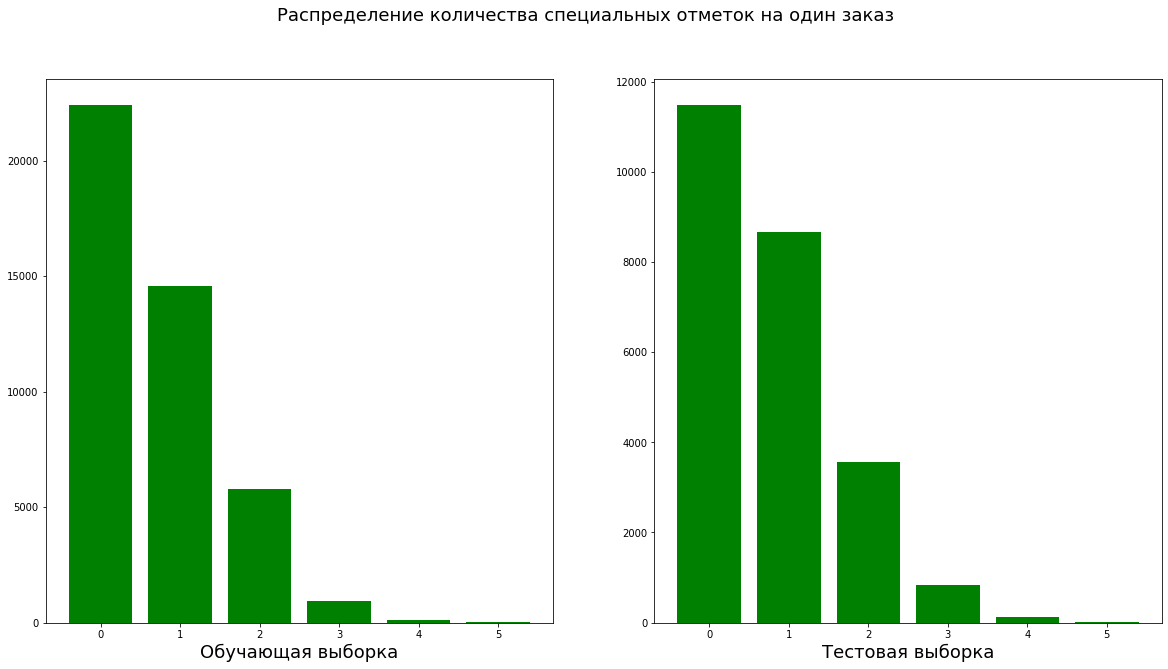

In [107]:
vals1 = hotel['total_of_special_requests'].value_counts()
vals2 = hotel_test['total_of_special_requests'].value_counts()

fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 10))

fig.suptitle('Распределение количества специальных отметок на один заказ', fontsize=18)

ax_1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=2)
ax_2 = plt.subplot2grid((2, 2), (0, 1), colspan=2, rowspan=2)

ax_1.bar(vals1.index, vals1, color='g')
ax_2.bar(vals2.index, vals2, color='g')

ax_1.set_xlabel('Обучающая выборка', fontsize=18)
ax_2.set_xlabel('Тестовая выборка', fontsize=18)

plt.show()

Преимущественно заказчики обходятся без дополнительных отметок, далее по порядке количественно значения убывают.

Столбец `'total_nights'` содержит важный параметр для туристской индустрии - количество ночей, заявленных в заказе. Рассмотрим на предмет возможных аномалий и выбросов данный столбец в наших выборках.

Взглянем на уникальные значения столбца и распределении значений.

In [108]:
hotel['total_nights'].unique()

array([ 1,  2,  3,  4,  6,  7,  5,  8, 10,  9])

In [109]:
hotel_test['total_nights'].unique()

array([ 1,  4,  7,  2,  5,  6,  3,  8,  9, 10])

In [110]:
hotel['total_nights'].value_counts()

3     9628
1     9359
2     8440
4     7212
5     3599
7     3279
6     1605
8      476
9      123
10     114
Name: total_nights, dtype: int64

In [111]:
hotel_test['total_nights'].value_counts()

3     5876
4     4567
2     4541
1     4523
5     2076
7     1928
6      865
8      203
9       59
10      48
Name: total_nights, dtype: int64

Визуально представим данные в виде столбиковой диаграммы.

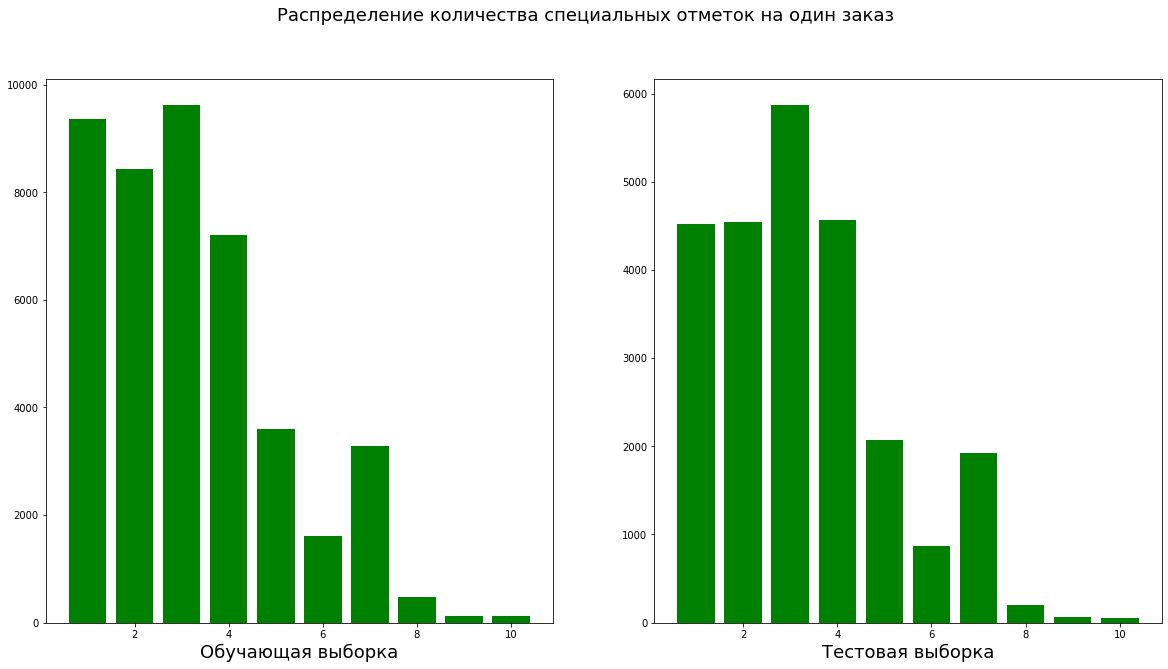

In [112]:
vals1 = hotel['total_nights'].value_counts()
vals2 = hotel_test['total_nights'].value_counts()

fig, (ax_1, ax_2) = plt.subplots(2, figsize=(20, 10))

fig.suptitle('Распределение количества специальных отметок на один заказ', fontsize=18)

ax_1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=2)
ax_2 = plt.subplot2grid((2, 2), (0, 1), colspan=2, rowspan=2)

ax_1.bar(vals1.index, vals1, color='g')
ax_2.bar(vals2.index, vals2, color='g')

ax_1.set_xlabel('Обучающая выборка', fontsize=18)
ax_2.set_xlabel('Тестовая выборка', fontsize=18)

plt.show()

In [113]:
hotel['total_nights'].mean()

3.207573856507357

In [114]:
hotel_test['total_nights'].mean()

3.2893947986713115

Здесь распределение уже куда интереснее, в 2017 году стало выше среднее количество ночей для одного заказа. Теперь для заказа самым типичным значением для количество ночей является три ночи, хотя в предыдущие два года таким значением было две ночи.

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: судя по описанию, `total_nights` — это сумма `stays_in_week_nights` и `stays_in_weekend_nights`, можно это проверить, и если это и правда так, то все три признака не нужны, некоторые лучше удалить</div>

Исходя из наименование столбца, столбец `'total_nights'` хранит в себе сумму значений других столбцов `'stays_in_week_nights'` и `'stays_in_weekend_nights'`, проверим такое предположение.

In [115]:
(hotel['total_nights'] == hotel['stays_in_week_nights'] + hotel['stays_in_weekend_nights']).sum() == len(hotel)

True

In [116]:
(hotel_test['total_nights'] == hotel_test['stays_in_week_nights'] + hotel_test['stays_in_weekend_nights']).sum() == len(hotel_test)

True

<div class="alert alert-info">
    <b>Комментарий студента:</b> Алексей, скажи, пожалуйста, есть ли какой более элегантный способ доказать такое равенство?)
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: такой способ вполне оптимальный, аналогичным образом можно проверить с помощью query, например:

    df.query('total_nights != stays_in_week_nights + stays_in_weekend_nights')
</div>

Cтолбец `'total_nights'` хранит в себе данные о сумме двух других столбцов о количестве ночей в будние и выходные дни, потому мы можем обойтись только данным столбцов, столбцы `'stays_in_weekend_nights'`и `'stays_in_week_nights'` удалим.

In [118]:
hotel = hotel.drop(['stays_in_weekend_nights'], axis=1)
hotel_test = hotel_test.drop(['stays_in_weekend_nights'], axis=1)


hotel = hotel.drop(['stays_in_week_nights'], axis=1)
hotel_test = hotel_test.drop(['stays_in_week_nights'], axis=1)

Выведем на экран результат анализа данных на предмет выявления аномалий и выбросов.

In [119]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43835 entries, 0 to 65228
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   is_canceled                     43835 non-null  int64 
 1   lead_time                       43835 non-null  int64 
 2   arrival_date_month              43835 non-null  object
 3   arrival_date_week_number        43835 non-null  int64 
 4   adults                          43835 non-null  int64 
 5   children                        43835 non-null  int64 
 6   has_babies                      43835 non-null  int64 
 7   meal                            43835 non-null  object
 8   country                         43835 non-null  object
 9   distribution_channel            43835 non-null  object
 10  is_repeated_guest               43835 non-null  int64 
 11  previous_cancellations          43835 non-null  int64 
 12  previous_bookings_not_canceled  43835 non-null

In [120]:
hotel_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24686 entries, 0 to 32411
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   is_canceled                     24686 non-null  int64 
 1   lead_time                       24686 non-null  int64 
 2   arrival_date_month              24686 non-null  object
 3   arrival_date_week_number        24686 non-null  int64 
 4   adults                          24686 non-null  int64 
 5   children                        24686 non-null  int64 
 6   has_babies                      24686 non-null  int64 
 7   meal                            24686 non-null  object
 8   country                         24686 non-null  object
 9   distribution_channel            24686 non-null  object
 10  is_repeated_guest               24686 non-null  int64 
 11  previous_cancellations          24686 non-null  int64 
 12  previous_bookings_not_canceled  24686 non-null

Все в порядке, наши таблицы сохранили одноразмерность, лишившись несколько неинформативных столбцов для исследования и буквально единиц строк с аномальными значениями. В целом весьма важно обратить внимание на качество данных, мы столкнулись с довольно большим количеством дубликатов.

### Подготовка данных для работы модели

Для более эффективной работы модели важно провести ряд модификаций данных.

Как мы ранее заметили в данный присутствует неслучайная последовательность наблюдений, это может оказать отрицательное влияние на результаты прогноза моделей, потому мы смешаем в случайном порядке наши выборки с помощью функции **shuffle()**.

In [121]:
hotel = shuffle(hotel, random_state=12345)

Далее обновим порядок индексации.

In [122]:
hotel = hotel.reset_index(drop=True)

In [123]:
hotel.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,adults,children,has_babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,is_in_waiting_list,customer_type,is_parking_required,total_of_special_requests,total_nights
0,0,24,November,46,1,0,0,BB,NOR,TA/TO,0,0,0,A,0,0,Transient,0,1,3
1,0,159,August,34,2,1,0,HB,ESP,Direct,0,0,0,A,1,0,Transient,0,1,7
2,0,109,April,16,2,0,0,BB,FRA,TA/TO,0,0,0,B,1,0,Transient,0,0,4
3,1,123,June,27,2,0,0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,0,4
4,0,118,October,44,3,0,0,BB,DEU,TA/TO,0,0,0,D,0,0,Transient,0,1,4


То же проделаем с тестовой выборкой.

In [124]:
hotel_test = shuffle(hotel_test, random_state=12345)

In [125]:
hotel_test = hotel_test.reset_index(drop=True)

In [126]:
hotel_test.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,adults,children,has_babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,is_in_waiting_list,customer_type,is_parking_required,total_of_special_requests,total_nights
0,0,2,January,1,2,0,0,HB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,3
1,0,138,May,19,2,0,0,BB,CZE,TA/TO,0,0,0,A,2,0,Transient,1,0,3
2,0,11,May,18,2,0,0,SC,FRA,Direct,0,0,0,A,0,0,Transient,0,0,1
3,0,176,July,27,2,1,0,BB,IRL,TA/TO,0,0,0,E,0,0,Transient,0,1,7
4,1,168,August,35,3,0,0,BB,USA,TA/TO,0,0,0,D,0,0,Transient,0,0,3


In [127]:
hotel_test['is_canceled'][:1000].sum()

310

Отлично, теперь в порядке расположения данных в датасете наблюдается случайное распределение.

Для алгоритма линейной регрессии преобразуем категориальные данные в численные методом прямого кодирования, а для "деревянных" моделей порядкового кодирования. Проведем действия в отдельных переменных.

In [128]:
hotel_ohe = pd.get_dummies(hotel, drop_first=True)

In [129]:
hotel_test_ohe = pd.get_dummies(hotel_test, drop_first=True)

In [130]:
encoder = OrdinalEncoder()
hotel_ordinal = pd.DataFrame(encoder.fit_transform(hotel), columns=hotel.columns)

In [131]:
encoder = OrdinalEncoder()
hotel_test_ordinal = pd.DataFrame(encoder.fit_transform(hotel_test), columns=hotel_test.columns)

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: правильнее обучать кодировщик(и OHE, и OE) только на обучающей выборке, а трансформировать уже все, аналогично масштабированию, чтобы избежать проблем с кодированием. Тогда вместо get_dummies можно использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html" target="blank_">OneHotEncoder</a>, подробнее про различия можно почитать <a href="https://albertum.medium.com/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc" target="blank_">здесь</a>, а вот тут есть <a href="https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing">пример</a> использования
    
И get_dummies, и OneHotEncoder — это две реализации OHE. Но OneHotEncoder — это класс(термин из ООП), поэтому при его инициализации создается объект класса. При обучении кодировщика в его объект сохраняются категории, которые ему были переданы при обучении, поэтому при кодировании других выборок с разным набором категорий в категориальных признаках проблем уже не возникнет.
    
get_dummies же просто возвращает набор новых столбцов и никакой дополнительной информации уже не хранит. Он подходит для анализа данных, но для ML используется именно OneHotEncoder

Обрати внимание, что в следующих проектах это будет считаться критичной ошибкой
</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Спасибо большое! Обязательно изучу работу класса. Правда, вторая ссылка не работает, если ли где-то копия статьи? Насколько вот такая статья: https://pythonsimplified.com/difference-between-onehotencoder-and-get_dummies/
может быть аналогом?

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: твоя статья вполне подходит :) В ней еще указано важное преимущество OneHotEncoder — он прекрасно работает вместе с пайплайнами</div>

Следующим шагом выделим целевой признак в имеющихся у нас выборках.

In [132]:
target_hotel_ohe = hotel_ohe['is_canceled']
features_hotel_ohe = hotel_ohe.drop('is_canceled', axis=1)

target_hotel_test_ohe = hotel_test_ohe['is_canceled']
features_hotel_test_ohe = hotel_test_ohe.drop('is_canceled', axis=1)

target_hotel_ordinal = hotel_ordinal['is_canceled']
features_hotel_ordinal = hotel_ordinal.drop('is_canceled', axis=1)

target_hotel_test_ordinal = hotel_test_ordinal['is_canceled']
features_hotel_test_ordinal = hotel_test_ordinal.drop('is_canceled', axis=1)

Для численных переменных произведем масштабирование датасетов, которые потребуются для работы алгоритма линейной регрессии.

In [137]:
numeric = [
    'lead_time',
    'adults',
    'arrival_date_week_number',
    'children',
    'has_babies',
    'is_repeated_guest',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'is_in_waiting_list',
    'is_parking_required',
    'total_of_special_requests',
    'total_nights'    
]

scaler = StandardScaler()
scaler.fit(features_hotel_test_ohe[numeric])


features_hotel_ohe[numeric] = scaler.transform(features_hotel_ohe[numeric])
features_hotel_test_ohe[numeric] = scaler.transform(features_hotel_test_ohe[numeric])


Отлично, данные готовы для обучения и тестирования моделей.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: хорошо, что не забываешь про масштабирование!</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: так как у тебя получилась разная предобработка для разных моделей(это вполне нормально), то здесь особенно кстати будут полезны пайплайны, они помогут собрать всю предобработку в одном месте и избавиться от кучи переменных с выборками
    
Подробнее про пайплайны:
* https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
* https://scikit-learn.org/stable/modules/compose.html
* https://towardsdatascience.com/how-to-use-sklearn-pipelines-for-ridiculously-neat-code-a61ab66ca90d</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Отлично! Спасибо! Попробую использовать в будущих работах, это отличный замена кучи переменных, которые и выглядят все хуже и хуже с каждым новым преобразованием))

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

## Оценка прибыли отеля до внедрения депозитов

Для подсчета прибыли мы выберем тестовую выборку, поскольку именно на ней мы будем проверять коммерческий успех будущих моделей.

Лучшим способом решить данную задачу будет очередность нескольких функций, так наглядней станет наш датасет и более читаем наш код. Для начала создадим новый столбец со стоимостью номеру по умолчанию согласно категории: 

категория A: за ночь — 1 000;

категория B: за ночь — 800;

категория C: за ночь — 600; 

категория D: за ночь — 550;

категория E: за ночь — 500;

категория F: за ночь — 450;

категория G: за ночь — 350.

In [138]:
def default_price(category):
    if  category == 'A':
        return 1000
    if category == 'B':
        return 800
    if category == 'C':
        return 600
    if category == 'D':
        return 550
    if category == 'E':
        return 500
    if category == 'F':
        return 450
    if category == 'G':
        return 350

In [139]:
hotel_test['default_price'] = hotel_test['reserved_room_type'].apply(default_price)

Исходя из условия номер в определенное время может увеличивать  свою стоимость.  ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%. Создадим соответствующую функцию и зафиксируем значения в датасете для каждого наблюдения.

In [140]:
def final_price(df):
    price = df['default_price']
    month = df['arrival_date_month']
    if month == 'June' or month == 'July' or month == 'August':
        return price * 1.4
    if month == 'March' or month == 'April' or month == 'May' \
    or month == 'September' or month == 'October' or month == 'November':
        return price * 1.2
    else:
        return price
    
    

In [141]:
hotel_test['final_price'] = hotel_test.apply(final_price, axis=1)

В отдельном столбце внесем стоимость услуг вдень за обсуживание номера, в том числе данную сумму теряет отель в случае отмены заказа клиентом:

категория A: разовое обслуживание — 400;

категория B: разовое обслуживание — 350;

категория C: разовое обслуживание — 350;

категория D: разовое обслуживание — 150;

категория E: разовое обслуживание — 150;

категория F: разовое обслуживание — 150;

категория G:разовое обслуживание — 150.

In [142]:
def service_expenses(category):
    if  category == 'A':
        return 400
    if category == 'B' or category == 'C':
        return 350
    if category == 'D' or category == 'E' or category == 'F' or category == 'G':
        return 150

In [143]:
hotel_test['service_expenses'] = hotel_test['reserved_room_type'].apply(service_expenses)

В новом же столбце посчитаем итоговую прибыль или зафиксируем убыток для каждого отдельного наблюдения.

In [144]:
def profitability(df):
    cancel = df['is_canceled']
    income = df['final_price']
    expenses = df['service_expenses']
    nights = df['total_nights']
    if cancel == 0:
        return income * nights - (1 + nights // 2) * expenses
    if cancel == 1:
        return 0 - expenses - income
        

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: здесь есть пара важных моментов:
1. В случае отмены бронирования отель несет убытки в размере стоимости одной уборки и одной ночи(с учетом сезонного коэффициента), а по твоей формуле учитывается только стоимость уборки, нужно поправить
2. Для того, чтобы рассчитать прибыль действительно необходимо умножить количество ночей на стоимость за номер, но здесь необходимо доразобраться с количеством уборок, по этому поводу в задании есть две фразы:
    - Если клиент снял номер надолго, то убираются каждые два дня.
    - Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца
    
    А отсюда мы узнаем три факта:
    - в задании не указано, что значит «снял номер надолго», тогда здесь подразумевается любой срок от 2 ночей;
    - затраты на обслуживание в случае, когда клиент заселился, нужно вычитать из суммарной стоимости за номер, а не прибавлять — это у тебя реализовано;
    - есть еще одна обязательная уборка перед заселением клиента;
    
    Тогда для того, чтобы рассчитать количество уборок для любого количества ночей можно использовать формулу `1 + total_nights // 2`. Получается следующее:

    1 ночь, убираться будут только перед заселением 1 + 1 // 2 = 1

    2 ночи, убираться будут днем после первой ночи и перед заселением, 1 + 2 // 2 = 2

    3 ночи, убираться будут днем после первой ночи и перед заселением, 1 + 3 // 2 = 2

    4 ночи, убираться будут днем после первой ночи, днём после третьей ночи и перед заселением, 1 + 4 // 2 = 3 и т.д.

</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Сорри, невнимательно прочел условия задачи, поправил функцию.

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: теперь прибыль до внедрения модели рассчитана верно!</div>

In [145]:
hotel_test['profit'] = hotel_test.apply(profitability, axis=1)

Ознакомимся с результатами работу функций и метода **apply()**.

In [147]:
hotel_test.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,adults,children,has_babies,meal,country,distribution_channel,...,booking_changes,is_in_waiting_list,customer_type,is_parking_required,total_of_special_requests,total_nights,default_price,final_price,service_expenses,profit
0,0,2,January,1,2,0,0,HB,PRT,TA/TO,...,0,0,Transient,0,0,3,1000,1000.0,400,2200.0
1,0,138,May,19,2,0,0,BB,CZE,TA/TO,...,2,0,Transient,1,0,3,1000,1200.0,400,2800.0
2,0,11,May,18,2,0,0,SC,FRA,Direct,...,0,0,Transient,0,0,1,1000,1200.0,400,800.0
3,0,176,July,27,2,1,0,BB,IRL,TA/TO,...,0,0,Transient,0,1,7,500,700.0,150,4300.0
4,1,168,August,35,3,0,0,BB,USA,TA/TO,...,0,0,Transient,0,0,3,550,770.0,150,-920.0


Все готово, посчитаем сумму доход по выборке без внедрения датасетов.

In [250]:
hotel_test['profit'].sum()

32656680.0

В дальнейших расчетах нам будут нужны константы прибыли до применения модели и сумма затрат на модель.

In [199]:
PRORIT_BEFORE = hotel_test['profit'].sum()

MODEL_PRICE = 400000

Прибыль посчитана, за период в 8 месяцев 2017 года она составила  32 656 680 у.е. Теперь датасет содержит информацию о прибыльности каждого отдельного бронирования. В нашем распоряжении данные отличного качества и все функции отработали штатно. Задачей для нашей модели будет показать на тестовой выборе не только хорошую прогнозируемость, но и окупить вложенные в ее разработку средства в размере 400 000 у.е.

## Разработка модели ML и оценка прибыли, которая принесет лучшая модель

### Оценка моделей с помощью кросс-валидации

Для решения задачи классификации мы будет использовать три алгоритма модели: "линейную регрессию", "дерево-решений" и "случайный лес". Мы проведем валидацию моделей с помощью кросс-вариационного метода, выберем лучшую модель с лучшему же гиперпараметрами, исходя из метрики F1, метрики показывающий баланс между полнотой и точностью предсказаниями. Модель должна сохранять точность, крайне важно указать и выставить условие внесения депозита действительно "ненадежному" клиенту и избежать такой практики применения условия к "надежному", при этом модель должна быть не чрезмерно осторожной для определения положительного класса, ведь именно в этот есть потенциал ее коммерческой успешности.

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: перед обучением нужно выбрать основную метрику для оценки моделей и аргументировать свой выбор, исходя из бизнес-задачи, это очень важная часть проекта. Ниже ты используешь accuracy, и если ты считаешь, что эта метрика лучше других позволит максимизировать прибыль(путем минимизации убытков от отмен бронирования), то нужно это пояснить</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Я все же пересмотрел оценочную метрику моделей, выбрав F1. Описал подробнее об актуальности выбора ее в исследовании.

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: окей, принимается :)</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: но согласно заданию, ложноположительные ответы не так критичны, так как депозит просто пойдет в стоимость оплаты. Но тут может возникнуть другая проблема: депозит может отпугнуть клиентов на этапе бронирования, в том числе «надежных». Так как мы не знаем, какие именно издержки понесет отель в этом случае, тогда стоит попробовать компенсировать это не метрикой, а экспериментом. Для этого можно попробовать проверить такой сценарий, назовем его худшим: пусть половина случайных клиентов из тех, с кого модель предложит взять депозит(вне зависимости от факта отмены), откажутся от услуг. Если сможешь рассчитать выручку в таком случае, будет очень наглядно, стоит ли внедрять модель</div>

Применим алгоритм "линейной регрессии":

In [155]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')

scores = cross_val_score(model, features_hotel_ohe, target_hotel_ohe, cv=5, scoring = 'f1')

cross_score = sum(scores) / len(scores)

print('Средняя оценка качества модели:', cross_score)

Средняя оценка качества модели: 0.5697145124624466


Линейная регрессия показала результат 0.56, посмотрим что продемонстрируют "деревянные" модели. Начнем с алгоритма "дерево-решений".

In [158]:
result_treeclass = 0

for depth in range(1, 31):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    scores = cross_val_score(model, features_hotel_ordinal, target_hotel_ordinal, cv=5, scoring = 'f1')
    cross_score = sum(scores) / len(scores)
    if cross_score > result_treeclass:
        result_treeclass = cross_score
        best_max_depth = depth
        
print(f'F1-оценка лучшей модели: {result_treeclass} \
\nЛучшее значение гиперпараметра "max_depth": {best_max_depth}')

F1-оценка лучшей модели: 0.599492958160563 
Лучшее значение гиперпараметра "max_depth": 11


Результат модели "дерева-решений" улучшил показатель регрессионной модели. Следующий в очереди алгоритм - это алгоритм "случайного леса".

In [172]:
%%time

result_randomforest = 0

for est in range(11, 16):
    for depth in range(17, 21):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        scores = cross_val_score(model, features_hotel_ordinal, target_hotel_ordinal, cv=5, scoring = 'f1')
        cross_score = sum(scores) / len(scores)
        if cross_score > result_randomforest:
            result_randomforest = cross_score
            best_max_depth = depth
            best_n_estimators = est
            
print(f'F1-оценка лучшей модели: {result_randomforest} \
\nЛучшее значение гиперпарметра "n_estimators": {best_n_estimators} \
\nЛучшее значение гиперпараметра "max_depth": {best_max_depth}')

F1-оценка лучшей модели: 0.6368465314095186 
Лучшее значение гиперпарметра "n_estimators": 14 
Лучшее значение гиперпараметра "max_depth": 18
CPU times: user 37.6 s, sys: 71.9 ms, total: 37.7 s
Wall time: 38.1 s


Отлично! Алгоритм "случайного леса" превзошел всех своих "конкурентов" и показал лучший результат метрики **f1** - 0.63. Именно данную модель мы применим к тестовой выборке и произведем прогноз прибыльности модели.

Обучим лучшую модель и проверим ее на тестовой выборке.

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: не обязательно проводить кросс-валидацию вручную, можно использовать известный тебе метод cross_val_score. Нужную метрику можно указать с помощью параметра scoring, подробнее про это можно почитать в <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html" target="blank_">документации</a>, а список поддерживаемых метрик можно найти <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter" target="blank_">здесь</a></div>

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: для честного эксперимента необходимо настроить модели. Убедись, что подбираешь хотя бы по 2-3 разных гиперпараметра(помимо взвешивания классов) для **каждой** модели, выбранной тобой для исследования</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Я все же пересмотрел оценочную метрику моделей, выбрав F1. Описал подробнее об актуальности выбора ее в исследовании.

<div class="alert alert-warning">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: вне зависимости от выбранной метрики, модели необходимо настроить хотя бы по 2 разных гиперпараметра, чтобы результаты исследования были показательны. Пожалуйста, поправь этот момент самостоятельно, в последующих проектах это также будет считаться критичной ошибкой</div>

In [187]:
predictions = best_model.predict(features_hotel_test_ordinal)
f1_result = f1_score(target_hotel_test_ordinal, predictions)
precision_result = precision_score(target_hotel_test_ordinal, predictions)
recall_result = recall_score(target_hotel_test_ordinal, predictions)

    
print(f'F1 лучшей модели "cлучайного леса" на тестовой выборке: {f1_result} \
\nТочность лучшей модели "cлучайного леса" на тестовой выборке: {precision_result} \
\nПолнота лучшей модели "cлучайного леса" на тестовой выборке: {recall_result}')

F1 лучшей модели "cлучайного леса" на тестовой выборке: 0.4534166222289937 
Точность лучшей модели "cлучайного леса" на тестовой выборке: 0.5570947210782479 
Полнота лучшей модели "cлучайного леса" на тестовой выборке: 0.38227360308285163


На тестовой выборке мы получили более скромный результат - 0.45. Важнейший параметр для оценки работы модели будет иметь ее рентабельность. Проверим модель на вменяемость, рассчитав показатель AUC-ROC.

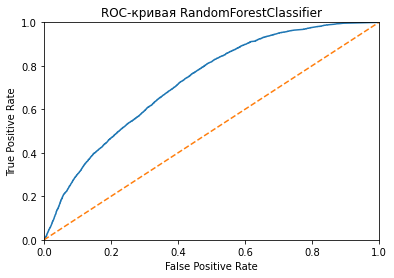

In [195]:
probabilities_valid = best_model.predict_proba(features_hotel_test_ordinal)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_hotel_test_ordinal, probabilities_one_valid)

plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title("ROC-кривая RandomForestClassifier")

plt.show()

In [198]:
print('Площадь области по ROC-кривой (AUC-ROC):', roc_auc_score(target_hotel_test_ordinal, probabilities_one_valid))

Площадь области по ROC-кривой (AUC-ROC): 0.7250584869224257


Как мы видим, наша модель заметно лучше случайной модели, что подтверждает вменяемость нашей модели. Приступил к расчету рентабельности модели.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: лайк за проверку на адекватность!</div>

### Оценка рентабельности работы модели

Для оценки коммерческого успеха модели сделаем новый столбец с прогнозами модели по наблюдениям тестовой выборки.

In [180]:
predict_siries = pd.Series(predictions, dtype=int, name='predict')

In [181]:
hotel_test = pd.concat([hotel_test, predict_siries], axis=1)

In [182]:
hotel_test.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,adults,children,has_babies,meal,country,distribution_channel,...,is_in_waiting_list,customer_type,is_parking_required,total_of_special_requests,total_nights,default_price,final_price,service_expenses,profit,predict
0,0,2,January,1,2,0,0,HB,PRT,TA/TO,...,0,Transient,0,0,3,1000,1000.0,400,2200.0,0
1,0,138,May,19,2,0,0,BB,CZE,TA/TO,...,0,Transient,1,0,3,1000,1200.0,400,2800.0,0
2,0,11,May,18,2,0,0,SC,FRA,Direct,...,0,Transient,0,0,1,1000,1200.0,400,800.0,0
3,0,176,July,27,2,1,0,BB,IRL,TA/TO,...,0,Transient,0,1,7,500,700.0,150,4300.0,0
4,1,168,August,35,3,0,0,BB,USA,TA/TO,...,0,Transient,0,0,3,550,770.0,150,-920.0,1


Для расчета рентабельности модели построим функцию, в которой рассчитаем сумму депозита для тех случаев, когда модель предсказала верно отмену бронирования клиентом. Согласно условия размер депозита - это 80% от стоимости номера за одни сутки и затрат на разовую уборку. Расходы отеля депозит покрывает только на 80% от затрат в случает отказа от бронирования.

In [183]:
def model_profit(df):
    price = df['final_price']
    expenses = df['service_expenses']
    cancel = df['is_canceled']
    predict = df['predict']
    profit = df['profit']
    if cancel == 1 and predict == 1:
        return (price + expenses) * 0.8 - (price + expenses)
    else:
        return profit

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: почти все так, но и в случае успешного определения отмены бронирования отель тоже уйдет в минус, так как отель все также понесет убытки в размере стоимости одной уборки и одной ночи(с учетом сезонного коэффициента), депозит покроет только 80%, 20% останется</div>

<div class="alert alert-info">
    <b>Комментарий студента:</b> Поправил

<div class="alert alert-success">
<h2>Комментарий ревьюера v2<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все так :) Можно поступить еще проще и просто умножить прибыль в этом случае на 0.2:

    def model_profit(df):
        cancel = df['is_canceled']
        predict = df['predict']
        profit = df['profit']
        if cancel == 1 and predict == 1:
            return profit * 0.2
        else:
            return profit
</div>

In [184]:
hotel_test['model_profit'] = hotel_test.apply(model_profit, axis=1)

In [185]:
hotel_test.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,adults,children,has_babies,meal,country,distribution_channel,...,customer_type,is_parking_required,total_of_special_requests,total_nights,default_price,final_price,service_expenses,profit,predict,model_profit
0,0,2,January,1,2,0,0,HB,PRT,TA/TO,...,Transient,0,0,3,1000,1000.0,400,2200.0,0,2200.0
1,0,138,May,19,2,0,0,BB,CZE,TA/TO,...,Transient,1,0,3,1000,1200.0,400,2800.0,0,2800.0
2,0,11,May,18,2,0,0,SC,FRA,Direct,...,Transient,0,0,1,1000,1200.0,400,800.0,0,800.0
3,0,176,July,27,2,1,0,BB,IRL,TA/TO,...,Transient,0,1,7,500,700.0,150,4300.0,0,4300.0
4,1,168,August,35,3,0,0,BB,USA,TA/TO,...,Transient,0,0,3,550,770.0,150,-920.0,1,-184.0


In [258]:
PROFIT_MODEL = hotel_test['model_profit'].sum() - PRORIT_BEFORE - MODEL_PRICE

print('Модель приносит доход в', PROFIT_MODEL, 'у.е')

Модель приносит доход в 2825984.0 у.е


Как мы видим работа модели убедительна и на экономических показателях.

Далее сделаем прогноз по прибыльности модели на один год, поскольку в тестовой выборке у нас нет нескольких месяцев, а именно - сентября, октября, ноября и декабря, достаточно популярных для заселения. Прежде проанализируем, можем ли мы распределение отказов от бронирования за 2016 год экстраполировать на наблюдения 2017 года.

In [244]:
hotel_plt1 = hotel_original[hotel_original['arrival_date_year'] == 2016].groupby(['arrival_date_month'], sort=False).agg({'is_canceled': 'sum'})
hotel_plt2 = hotel_test_original.groupby(['arrival_date_month']).agg({'is_canceled': 'sum'})

In [245]:
hotel_plt = pd.concat([hotel_plt1, hotel_plt2], axis=1)

In [246]:
hotel_plt.columns = ['2016', '2017']

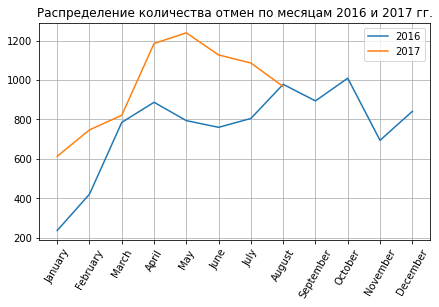

In [247]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()

ax.plot(hotel_plt['2016'], label='2016')
ax.plot(hotel_plt['2017'], label='2017')
ax.legend()
plt.title('Распределение количества отмен по месяцам 2016 и 2017 гг.')
plt.xticks(rotation=60)
plt.grid()
plt.show()

Графики распределения схожи друг с другом, в августе сошлись в одной точке, потому сделаем допущения о том, что количество отмен в конце 2017 года будет таким же, как и в 2016 году.
Далее посчитаем средние значения прибыли от прогнозов модели и среднее значение суммы расходов разового обслуживания в 2017 году для прогнозирования теоретически минимальной суммы прибыли по строкам верных предсказаний модели положительного класса. 

In [252]:
mean_cancel_profit_2017 = hotel_test['model_profit'].mean()

Также посчитаем количество отмененных бронирований в за период конца года, периода, неприсутствующего в тестовой выборке.

In [254]:
X = hotel_original[
    (hotel_original['arrival_date_month'] == 'September') | (hotel_original['arrival_date_month'] == 'October') \
    | (hotel_original['arrival_date_month'] == 'November') | (hotel_original['arrival_date_month'] == 'December')
]['is_canceled'].sum()

print(
    'Средняя сумма прибыли, приносимая прогнозированием модели за имеющийся период 2017 года:', mean_cancel_profit_2017, \
    '\nКоличество инцидентов отмены заказов за период сентябрь - декабрь 2016 года:', X
)

Средняя сумма прибыли, приносимая прогнозированием модели за имеющийся период 2017 года: 1453.5633152394068 
Количество инцидентов отмены заказов за период сентябрь - декабрь 2016 года: 4711


У нас есть все необходимые переменные у нас есть, перейдем к расчету.

In [259]:
profit_prediction = X * recall_result * mean_cancel_profit_2017
new_profit = PRORIT_BEFORE + profit_prediction + PROFIT_MODEL

print(f'Прогноз прибыли от работы модели за период сентябрь - декабрь 2017 года: {profit_prediction:.2f} \
\nПрогноз прибыли от работы модели за полный 2017 год: {new_profit:.2f}')



Прогноз прибыли от работы модели за период сентябрь - декабрь 2017 года: 2617709.01 
Прогноз прибыли от работы модели за полный 2017 год: 38100373.01


Мы видим рентабельность нашей модели на основе прогноза на целый год. Прогнозирующая модель приносит прибыль даже в самом худшем сценарии.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

## Выявляем признаки "ненадежного" клиента 

Для рекомендаций относительно "надежного" клиента, клиента, который подтвердит бронирование и им воспользуется нам важно проверить ряд гипотез, и на основе результатов проверки гипотез выявить действительные признаки определяющие категории клиентов.

Для начала разделим нашу выборку на две части: выборка клиентов с отказами от бронирования и выборка клиентов, подтвердивших свое бронирование.

In [214]:
hotel_confirmed = hotel[hotel['is_canceled'] == 0]

In [215]:
hotel_cancel = hotel[hotel['is_canceled'] == 1]

In [229]:
hotel_cancel

,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,adults,children,has_babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,is_in_waiting_list,customer_type,is_parking_required,total_of_special_requests,total_nights
3,1,123,June,27,2,0,0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,0,4
6,1,8,May,21,1,0,0,BB,PRT,Corporate,1,1,1,D,1,0,Transient-Party,0,0,1
7,1,80,September,40,1,0,0,BB,PRT,TA/TO,0,0,0,D,0,0,Transient,0,1,4
9,1,0,September,37,2,0,0,BB,PRT,Direct,1,0,0,A,0,0,Group,0,0,1
10,1,71,March,10,2,0,0,BB,RUS,TA/TO,0,0,0,A,0,0,Transient,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43827,1,53,February,9,2,0,0,SC,ESP,TA/TO,0,0,0,A,0,0,Transient,0,0,3
43829,1,116,August,32,3,0,0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,3
43830,1,232,November,48,2,0,0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,3
43831,1,77,June,27,2,0,0,BB,DEU,TA/TO,0,0,0,A,0,0,Transient,0,1,1


Проверим есть ли статистически значимая разница в двух средних наших выборках с помощью t-критерия Стьюдента.
Рассмотрим средние показатели в выборках по столбцу `'lead_time'`, количеству дней между датой бронирования и датой заезда. 

In [216]:
hotel_confirmed['lead_time'].mean()

60.27812280111359

In [217]:
hotel_cancel['lead_time'].mean()

90.20981341944743

Первая пара гипотез звучит так: H0 - между выборками нет различий, количество дней между датами заезда и бронирования не оказывают влияния на отмену бронирования, H1 - говорит обратное, указанный фактор значим.

In [218]:
alpha = 0.05

results = st.ttest_ind(hotel_cancel['lead_time'], hotel_confirmed['lead_time'], equal_var=False)


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.133815667016853e-267
Отвергаем нулевую гипотезу


По результатам анализа мы можем отвергнуть нулевую гипотезу, и сделать предположение о значимости указаного параметра, чем дольше время ожидания заезда, тем вероятнее отказ от бронирования.  

Далее построим гипотезу о значимых различиях средних в выборках по столбцу `'total_of_special_requests'`, столбец указывает на количество особых отметок к заказу со стороны клиента. 

Гипотеза H0 - выборки принадлежат одной генеральной совокупности и не имеют различий, H1 - выборки имеют различия.

In [219]:
hotel_cancel['total_of_special_requests'].mean()

0.486275565123789

In [220]:
hotel_confirmed['total_of_special_requests'].mean()

0.7337167681341206

In [221]:
alpha = 0.05


results = st.ttest_ind(hotel_cancel['total_of_special_requests'], hotel_confirmed['total_of_special_requests'], equal_var=False)


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.047283944575905e-190
Отвергаем нулевую гипотезу


T-критерий отверг нулевую гипотезу и можем утверждать, что вероятнее всего клиент подтвердит бронирование при наличии у него особых отметок. Этот признак можно включить в наши рекомендации. 

Построим наш статистических анализ на основе различий показателя `previous_cancellations` - количеству отменённых заказов у клиента.

In [222]:
hotel_cancel['previous_cancellations'].mean()

0.10450304987441694

In [223]:
hotel_confirmed['previous_cancellations'].mean()

0.020222106647902836

Нулевая гипотеза H0 - выборки не имеют значимых различий и количество отмененных ранее заказов не влияют или мало влияют на новый выбор клиента, H1, напротив, устанавливает различие между двумя выборками.

In [224]:
alpha = 0.05

results = st.ttest_ind(hotel_cancel['previous_cancellations'], hotel_confirmed['previous_cancellations'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.2292214665124895e-36
Отвергаем нулевую гипотезу


По результатам мы может отвергнуть нулевую гипотезу в пользу гипотезы H1. Чем больше был опыт на отмену заказов у клиента, тем более вероятнее его повторение.

Следующя пара гипотез проверит различия в показателе `'days_in_waiting_list'`.
H0 - выборки принадлежат одной генеральной совокупности, принимая во внимание показатель времени подтверждения бронирования, значимых различий нет, H1 - имеется значимое различие между средними в выборках. 

In [230]:
hotel_cancel['is_in_waiting_list'].mean()

0.013545030498744169

In [232]:
hotel_confirmed['is_in_waiting_list'].mean()

0.010065163520665709

In [234]:
alpha = 0.05

results = st.ttest_ind(hotel_cancel['is_in_waiting_list'], hotel_confirmed['is_in_waiting_list'], equal_var=False)


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.004545241462856611
Отвергаем нулевую гипотезу


Критерий показал значимое различие выборках в этом показателе, и клиенты, которые дольше ждут подтверждения статуса бронирования больше, склонны к отказу от него.

Построим свои суждения и проведем анализ столбца `'total_nights'` о количестве дней при бронировании номера. 

Гипотеза H0 - будет звучать так, количество дней не влияет на решение клиента о заселении, гипотеза H1 в свою очередь предлагает альтернативный взгляд, средние покажут значимое различия показателя.

In [235]:
hotel_cancel['total_nights'].mean()

3.4321851453175456

In [236]:
hotel_confirmed['total_nights'].mean()

3.130969498577416

In [237]:
alpha = 0.05

results = st.ttest_ind(hotel_cancel['total_nights'], hotel_confirmed['total_nights'], equal_var=False)


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.937227942127321e-48
Отвергаем нулевую гипотезу


Как оказалось значимого различия между выборками не обнаружилось, мы не может отклонить гипотезу о незначительном отличии в выборках по параметру количества ночей бронировании номера. 

По результатам статистического исследования мы можем заключить, что "надежный" клиент имеет весьма определенные отличия от клиента склонного к отмене заказа. Чем дата бронирования отдалена от даты заезда, тем вероятнее отмена бронирования. А  чем дольше время ожидания подтверждения бронирования, тем вероятнее отказ от него. Для "надежного" клиента характерно включение в заказ особых отметок, а для "ненадежного" заметный имеющийся опыт в отказе от забронированного номера. 

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: хорошая идея — использовать статистические гипотезы для составления портрета «ненадежного» клиента :)</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: но здесь также стоит описать портрет с опорой на результаты модели, то есть того клиента, которого модель посчитала «ненадежным». Например, для этого можно узнать, как именно тот или иной признак влияет на обучение модели, для этого есть **feature_importances**, то есть важность признаков для решения модели. Это позволит дополнить портрет клиента и убедиться, что модель обучилась корректно, сравнив результаты исследовательского анализа с результатами модели. А если важность очень мала, то такие признаки можно даже удалить, метрики, вероятно, поменяются незначительно

Подробнее про **feature_importances**:
* https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285
* https://medium.com/analytics-vidhya/feature-importance-explained-bfc8d874bcf
* https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
* https://christophm.github.io/interpretable-ml-book/feature-importance.html</div>

## Вывод

В результате исследования нами построен весьма успешная и рентабельная модель, доказавшая свою эффективность в главной метрики для бизнеса - приносимая прибыль. Как мы увидели, модель ведет себя осторожно и дает положительную оценку значимому признаку весьма точно, что очень важно в таком деликатном вопросе, как взносе невозвратного депозита.

В ходе работы также были представлены характерные признаки "надежного" и "ненадежного" клиента. Клиент склонен отменить заказ, если он долго ожидает его подтверждения. В этом плане сервис становится оптимальнее, мы убедились в этом проводя анализ представленные данных, и сокращает время между этими событиями, так заметно влияющего на поведение пользователя. Здесь можем рекомендовать продолжать работу на оптимизацией этого процесса.

Особое внимание следует обратить на клиентов, уже пользующихся функцией отказа от бронирования, такой опыт чреват рецидивом. Также бронирование задолго до заселения может содержит потенциал для отмены бронирования.
Включение в заказ особых меток благориятно влияет на вероятность заселения.

Для закрепления результатов модели и выявленных характеристик рекомендуется провести оценку модели и по онлайн-метрикам, здесь очень важны A/B - тесты, поскольку требование о взносе обязательного депозита может оттолкнуть потенциально "надежного" клиента и снизить лояльность к сервису.

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера<a class="tocSkip"></a></h2>

Чистый и структурированный проект, спасибо, такие всегда приятно проверять!

Но тебе обязательно нужно обратить внимание на следующее:
* поправь расчет прибыли до и после внедрения модели;
* подбери по 2-3 гиперпараметра для каждой модели;
* выбери основную метрику и аргументируй свой выбор: подходящих метрик тут может быть несколько, но по сути основная задача с точки зрения ML — это минимизировать количество ложноотрицательных ответов. Но если разобраться, то и бизнес-метрика вполне может быть основной метрикой для оценки моделей, здорово, если у тебя получится это реализовать;

Остальные комментарии можно найти в проекте. Готов ответить на любые вопросы :)

<b>Жду доработанный проект на повторное ревью! Удачи!</b>
        
</div>

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера v2<a class="tocSkip"></a></h2>

То, что нужно, молодец!

Критичные замечания исправлены, и теперь я могу принять твою работу. Но не забудь подобрать по 2-3 разных гиперпараметра для каждой модели

<b>Успехов в обучении!</b>
        
</div>